# 🚗 CarPriceML - Pipeline Pédagogique Complet

**Projet:** Prédiction et déploiement intelligent du prix des voitures d'occasion

**Auteur:** Omar Hitar  
**Date:** 6 novembre 2025  

---

## ⚙️ Pipeline Pédagogique / Étapes principales

### 1️⃣ Préparation des données
- Charger le CSV dans un DataFrame Pandas
- Nettoyer les valeurs manquantes et supprimer les doublons
- Séparer variables numériques et catégorielles

### 2️⃣ Analyse exploratoire
- Statistiques descriptives et visualisations (histogrammes, boxplots)
- Vérification de la distribution des variables

### 3️⃣ Prétraitement
- Encodage des variables catégorielles (OneHotEncoder)
- Standardisation des variables numériques
- Création de nouvelles features si pertinent

### 4️⃣ Modélisation
- Entraîner un RandomForestRegressor
- Évaluer sur train/test split (70/30)
- Calculer RMSE, MAE, R²
- Sauvegarder le pipeline complet avec joblib

---

## 📚 Étape 0: Import des bibliothèques

In [2645]:
# Manipulation des données
import pandas as pd
import numpy as np

# Visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Prétraitement
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Machine Learning - Modèle
from sklearn.ensemble import RandomForestRegressor

# Machine Learning - Évaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Sauvegarde du modèle
import joblib

# Utilitaires
from datetime import datetime
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Toutes les bibliothèques sont importées avec succès!")
print(f"📅 Date d'exécution: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ Toutes les bibliothèques sont importées avec succès!
📅 Date d'exécution: 2025-11-07 21:12:44


---

# 1️⃣ PRÉPARATION DES DONNÉES

## 1.1 Charger le CSV dans un DataFrame Pandas

In [2646]:
# Charger le dataset
print("🔄 Chargement du fichier CSV...")
df = pd.read_csv('../data/raw/car-details.csv')

print("✅ Dataset chargé avec succès!")
print(f"📊 Dimensions: {df.shape[0]:,} lignes × {df.shape[1]} colonnes")
print(f"💾 Taille mémoire: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Aperçu des premières lignes
print("\n🔍 Aperçu des 5 premières lignes:")
df.head()

🔄 Chargement du fichier CSV...
✅ Dataset chargé avec succès!
📊 Dimensions: 6,926 lignes × 16 colonnes
💾 Taille mémoire: 3.51 MB

🔍 Aperçu des 5 premières lignes:
✅ Dataset chargé avec succès!
📊 Dimensions: 6,926 lignes × 16 colonnes
💾 Taille mémoire: 3.51 MB

🔍 Aperçu des 5 premières lignes:


,name,company,model,edition,year,owner,fuel,seller_type,transmission,km_driven,mileage_mpg,engine_cc,max_power_bhp,torque_nm,seats,selling_price
0,Maruti Swift Dzire VDI,Maruti,Swift,Dzire VDI,2014,First,Diesel,Individual,Manual,145500,55.00,1248.0,74.00,190.000000,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,Skoda,Rapid,1.5 TDI Ambition,2014,Second,Diesel,Individual,Manual,120000,49.70,1498.0,103.52,250.000000,5.0,370000
2,Honda City 2017-2020 EXi,Honda,City,2017-2020 EXi,2006,Third,Petrol,Individual,Manual,140000,41.60,1497.0,78.00,124.544455,5.0,158000
3,Hyundai i20 Sportz Diesel,Hyundai,i20,Sportz Diesel,2010,First,Diesel,Individual,Manual,127000,54.06,1396.0,90.00,219.668960,5.0,225000
4,Maruti Swift VXI BSIII,Maruti,Swift,VXI BSIII,2007,First,Petrol,Individual,Manual,120000,37.84,1298.0,88.20,112.776475,5.0,130000


In [2647]:
# Informations sur le dataset
print("📋 Informations sur les colonnes:")
df.info()

📋 Informations sur les colonnes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6926 entries, 0 to 6925
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   company        6926 non-null   object 
 2   model          6926 non-null   object 
 3   edition        6926 non-null   object 
 4   year           6926 non-null   int64  
 5   owner          6926 non-null   object 
 6   fuel           6926 non-null   object 
 7   seller_type    6926 non-null   object 
 8   transmission   6926 non-null   object 
 9   km_driven      6926 non-null   int64  
 10  mileage_mpg    6718 non-null   float64
 11  engine_cc      6718 non-null   float64
 12  max_power_bhp  6717 non-null   float64
 13  torque_nm      6717 non-null   float64
 14  seats          6718 non-null   float64
 15  selling_price  6926 non-null   int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 865.9+ KB


In [2648]:
# Statistiques descriptives
print("📊 Statistiques descriptives des variables numériques:")
df.describe()

📊 Statistiques descriptives des variables numériques:


,year,km_driven,mileage_mpg,engine_cc,max_power_bhp,torque_nm,seats,selling_price
count,6926.000000,6.926000e+03,6718.000000,6718.000000,6717.000000,6717.000000,6718.000000,6.926000e+03
mean,2013.420300,7.399568e+04,45.080782,1430.891337,87.766100,174.684585,5.434653,5.172707e+05
std,4.078286,5.835810e+04,10.693383,493.493277,31.724555,106.876249,0.984230,5.197670e+05
min,1983.000000,1.000000e+00,0.000000,624.000000,32.800000,47.071920,2.000000,2.999900e+04
25%,2011.000000,4.000000e+04,38.900000,1197.000000,67.100000,110.000000,5.000000,2.500000e+05
50%,2014.000000,7.000000e+04,45.340000,1248.000000,81.830000,160.000000,5.000000,4.000000e+05
75%,2017.000000,1.000000e+05,52.440000,1498.000000,100.000000,200.055660,5.000000,6.335000e+05
max,2020.000000,2.360457e+06,98.700000,3604.000000,400.000000,1863.263500,14.000000,1.000000e+07


In [2649]:
for col in df.columns:
    print('Unique values of ' + col)
    print(df[col].unique())
    print("======================")

Unique values of name
['Maruti Swift Dzire VDI' 'Skoda Rapid 1.5 TDI Ambition'
 'Honda City 2017-2020 EXi' ... 'Tata Nexon 1.5 Revotorq XT'
 'Ford Freestyle Titanium Plus Diesel BSIV'
 'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV']
Unique values of company
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot']
Unique values of model
['Swift' 'Rapid' 'City' 'i20' 'Xcent' 'Wagon' '800' 'Etios' 'Figo'
 'Duster' 'Zen' 'KUV' 'Ertiga' 'Alto' 'Verito' 'WR-V' 'SX4' 'Tigor'
 'Baleno' 'Enjoy' 'Omni' 'Vitara' 'Palio' 'Verna' 'GO' 'Safari' 'Compass'
 'Fortuner' 'Innova' 'B' 'Amaze' 'Pajero' 'Ciaz' 'Jazz' 'A6' 'Corolla'
 'New' 'Manza' 'i10' 'Ameo' 'Indica' 'Vento' 'EcoSport' 'X1' 'Celerio'
 'Polo' 'Eeco' 'Scorpio' 'Freestyle' 'Passat' 'XUV500' 'Indigo' 'Terrano'
 'Cre

## 1.2 Nettoyer les valeurs manquantes et supprimer les doublons

In [2650]:
df.drop(columns=['torque_nm'], inplace=True)
df.drop(columns=['edition'], inplace=True)
df.drop(columns=['model'], inplace=True)
df.drop(columns=['name'], inplace=True)

In [2651]:
df['company'].unique()
df.rename(columns={'company': 'brand'}, inplace=True)
df['brand'].unique()
df.head()

,brand,year,owner,fuel,seller_type,transmission,km_driven,mileage_mpg,engine_cc,max_power_bhp,seats,selling_price
0,Maruti,2014,First,Diesel,Individual,Manual,145500,55.00,1248.0,74.00,5.0,450000
1,Skoda,2014,Second,Diesel,Individual,Manual,120000,49.70,1498.0,103.52,5.0,370000
2,Honda,2006,Third,Petrol,Individual,Manual,140000,41.60,1497.0,78.00,5.0,158000
3,Hyundai,2010,First,Diesel,Individual,Manual,127000,54.06,1396.0,90.00,5.0,225000
4,Maruti,2007,First,Petrol,Individual,Manual,120000,37.84,1298.0,88.20,5.0,130000


In [2652]:
df.isnull().sum()

brand              0
year               0
owner              0
fuel               0
seller_type        0
transmission       0
km_driven          0
mileage_mpg      208
engine_cc        208
max_power_bhp    209
seats            208
selling_price      0
dtype: int64

In [2653]:
missing_before = df.isnull().sum().sum()

🔍 Analyse des valeurs manquantes:
               Valeurs_manquantes  Pourcentage
max_power_bhp                 209     3.017615
seats                         208     3.003176
mileage_mpg                   208     3.003176
engine_cc                     208     3.003176


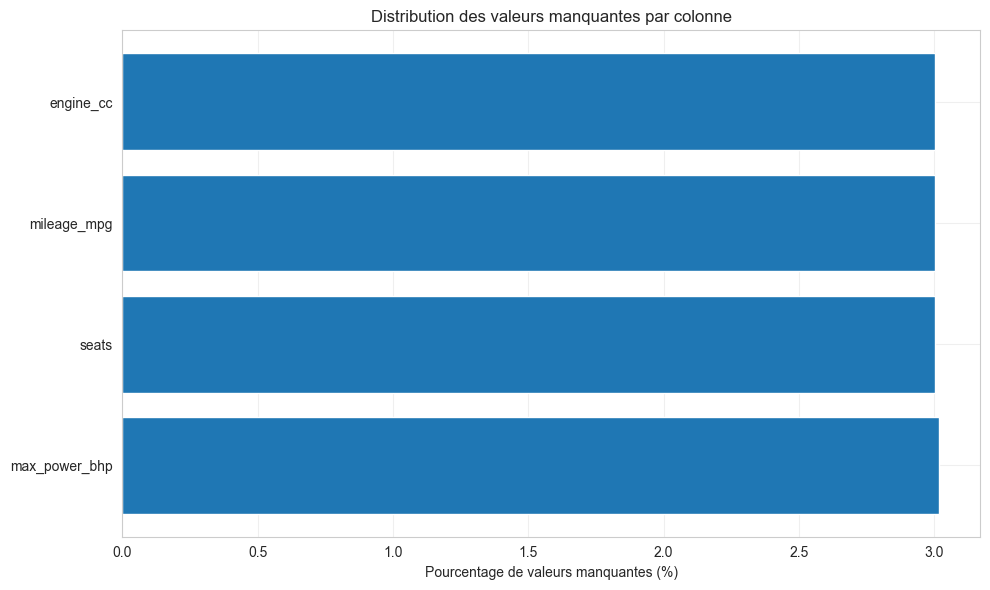

In [2654]:
# Analyser les valeurs manquantes
print("🔍 Analyse des valeurs manquantes:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_summary = pd.DataFrame({
    'Valeurs_manquantes': missing_data,
    'Pourcentage': missing_percent
}).sort_values('Valeurs_manquantes', ascending=False)

print(missing_summary[missing_summary['Valeurs_manquantes'] > 0])

# Visualisation des valeurs manquantes
if missing_summary['Valeurs_manquantes'].sum() > 0:
    plt.figure(figsize=(10, 6))
    missing_cols = missing_summary[missing_summary['Valeurs_manquantes'] > 0]
    plt.barh(missing_cols.index, missing_cols['Pourcentage'])
    plt.xlabel('Pourcentage de valeurs manquantes (%)')
    plt.title('Distribution des valeurs manquantes par colonne')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

In [2655]:
print("\n📊 Separating features...")
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Numeric features ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical features ({len(categorical_cols)}): {categorical_cols}")



📊 Separating features...
Numeric features (7): ['year', 'km_driven', 'mileage_mpg', 'engine_cc', 'max_power_bhp', 'seats', 'selling_price']
Categorical features (5): ['brand', 'owner', 'fuel', 'seller_type', 'transmission']


In [2656]:
# Stratégie de nettoyage des valeurs manquantes
# Imputation par la médiane pour les variables numériques (meilleure pratique)
print("🧹 Nettoyage des valeurs manquantes...")

# Sauvegarder la taille originale
original_shape = df.shape[0]

# Définir les colonnes numériques critiques
numerical_cols = ['year', 'km_driven', 'mileage_mpg', 'engine_cc', 'max_power_bhp', 'seats']

# Compter les valeurs manquantes avant imputation
missing_before = df[numerical_cols].isnull().sum().sum()

# Imputer les valeurs manquantes avec la médiane
df_clean = df.copy()
for col in numerical_cols:
    if df_clean[col].isnull().sum() > 0:
        median_value = df_clean[col].median()
        n_missing = df[col].isnull().sum()
        df_clean[col] = df_clean[col].fillna(median_value)
        print(f"   ✓ {col}: {n_missing} valeurs imputées avec médiane = {median_value:.2f}")

# Supprimer les lignes où le prix est manquant (variable cible)
df_clean = df_clean.dropna(subset=['selling_price'])

missing_after = df_clean[numerical_cols].isnull().sum().sum()

print(f"\n✅ Nettoyage terminé:")
print(f"   - Lignes originales: {original_shape:,}")
print(f"   - Lignes après nettoyage: {df_clean.shape[0]:,}")
print(f"   - Lignes supprimées: {original_shape - df_clean.shape[0]:,}")
print(f"   - Valeurs numériques imputées: {missing_before}")
print(f"   - Données conservées: {(df_clean.shape[0] / original_shape) * 100:.2f}%")

🧹 Nettoyage des valeurs manquantes...
   ✓ mileage_mpg: 208 valeurs imputées avec médiane = 45.34
   ✓ engine_cc: 208 valeurs imputées avec médiane = 1248.00
   ✓ max_power_bhp: 209 valeurs imputées avec médiane = 81.83
   ✓ seats: 208 valeurs imputées avec médiane = 5.00

✅ Nettoyage terminé:
   - Lignes originales: 6,926
   - Lignes après nettoyage: 6,926
   - Lignes supprimées: 0
   - Valeurs numériques imputées: 833
   - Données conservées: 100.00%


In [2657]:
# Supprimer les doublons
print("\n🔄 Vérification des doublons...")
duplicates = df_clean.duplicated().sum()
print(f"   - Doublons trouvés: {duplicates}")

if duplicates > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"   ✅ {duplicates} doublons supprimés!")
else:
    print("   ✅ Aucun doublon trouvé!")

print(f"   - Dataset final: {df_clean.shape[0]:,} lignes × {df_clean.shape[1]} colonnes")


🔄 Vérification des doublons...
   - Doublons trouvés: 19
   ✅ 19 doublons supprimés!
   - Dataset final: 6,907 lignes × 12 colonnes
   ✅ 19 doublons supprimés!
   - Dataset final: 6,907 lignes × 12 colonnes


## 1.3 Conversion de la devise (INR → MAD)

**Note:** Les prix sont en Roupies Indiennes (INR). Conversion en Dirhams Marocains (MAD).

In [2658]:
# Conversion de devise
INR_TO_MAD = 0.12  # Taux de conversion approximatif

print("💰 Conversion de devise: INR → MAD")
df_clean['price'] = df_clean['selling_price'] * INR_TO_MAD

print(f"   - Taux de conversion: 1 INR = {INR_TO_MAD} MAD")
print(f"   - Prix min (MAD): {df_clean['price'].min():,.2f}")
print(f"   - Prix max (MAD): {df_clean['price'].max():,.2f}")
print(f"   - Prix moyen (MAD): {df_clean['price'].mean():,.2f}")
print(f"   - Prix médian (MAD): {df_clean['price'].median():,.2f}")

# Supprimer la colonne originale
df_clean = df_clean.drop(columns=['selling_price'])

💰 Conversion de devise: INR → MAD
   - Taux de conversion: 1 INR = 0.12 MAD
   - Prix min (MAD): 3,599.88
   - Prix max (MAD): 1,200,000.00
   - Prix moyen (MAD): 62,093.47
   - Prix médian (MAD): 48,000.00


In [2659]:
# sorted(df_clean['price'],reverse=True)

## 1.4 Séparer variables numériques et catégorielles

In [2660]:
# Identifier les types de variables
print("🔢 Séparation des variables par type:")

# Colonnes à exclure (texte libre, identifiants)
exclude_cols = ['name', 'company', 'model', 'edition', 'price']

# Variables numériques (sélection manuelle pour contrôle pédagogique)
numerical_features = ['year', 'km_driven', 'mileage_mpg', 'engine_cc', 'max_power_bhp', 'seats']

# Variables catégorielles (sélection manuelle)
categorical_features = ['brand', 'owner', 'fuel', 'seller_type', 'transmission']

print(f"\n📊 Variables numériques ({len(numerical_features)}):")
for var in numerical_features:
    print(f"   - {var}: {df_clean[var].dtype} (min={df_clean[var].min():.1f}, max={df_clean[var].max():.1f})")

print(f"\n📝 Variables catégorielles ({len(categorical_features)}):")
for var in categorical_features:
    unique_count = df_clean[var].nunique()
    print(f"   - {var}: {unique_count} catégories → {list(df_clean[var].unique()[:5])}")

# Variable cible
target = 'price'
print(f"\n🎯 Variable cible: {target}")

print(f"\n✅ Séparation terminée: {len(numerical_features)} numériques + {len(categorical_features)} catégorielles = {len(numerical_features) + len(categorical_features)} features")

🔢 Séparation des variables par type:

📊 Variables numériques (6):
   - year: int64 (min=1983.0, max=2020.0)
   - km_driven: int64 (min=1.0, max=2360457.0)
   - mileage_mpg: float64 (min=0.0, max=98.7)
   - engine_cc: float64 (min=624.0, max=3604.0)
   - max_power_bhp: float64 (min=32.8, max=400.0)
   - seats: float64 (min=2.0, max=14.0)

📝 Variables catégorielles (5):
   - brand: 32 catégories → ['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota']
   - owner: 5 catégories → ['First', 'Second', 'Third', 'Fourth & Above', 'Test Drive Car']
   - fuel: 4 catégories → ['Diesel', 'Petrol', 'LPG', 'CNG']
   - seller_type: 3 catégories → ['Individual', 'Dealer', 'Trustmark Dealer']
   - transmission: 2 catégories → ['Manual', 'Automatic']

🎯 Variable cible: price

✅ Séparation terminée: 6 numériques + 5 catégorielles = 11 features


In [2661]:
for col in df.columns:
    print('Unique values of ' + col)
    print(df[col].unique())
    print("======================")

Unique values of brand
['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot']
Unique values of year
[2014 2006 2010 2007 2017 2001 2011 2013 2005 2009 2016 2012 2002 2015
 2018 2003 2019 2008 2020 1999 2000 1983 2004 1996 1994 1995 1998 1997
 1991]
Unique values of owner
['First' 'Second' 'Third' 'Fourth & Above' 'Test Drive Car']
Unique values of fuel
['Diesel' 'Petrol' 'LPG' 'CNG']
Unique values of seller_type
['Individual' 'Dealer' 'Trustmark Dealer']
Unique values of transmission
['Manual' 'Automatic']
Unique values of km_driven
[ 145500  120000  140000  127000   45000  175000    5000   90000  169000
   68000  100000   80000   40000   70000   53000   50000   72000   35000
   28000   25000    2388   16200   10000   15000   42000   60000   76000
   28900

---

# 2️⃣ ANALYSE EXPLORATOIRE

## 2.1 Statistiques descriptives et visualisations

📊 Distribution de la variable cible: PRIX


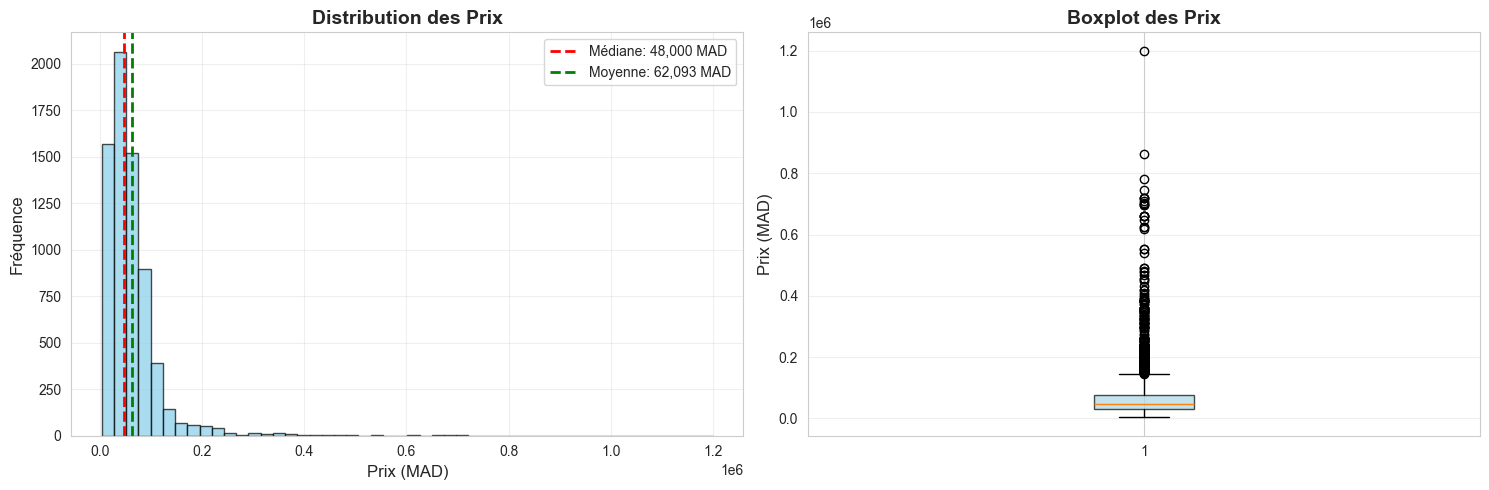


📈 Statistiques de la variable cible:
   - Moyenne: 62,093.47 MAD
   - Médiane: 48,000.00 MAD
   - Écart-type: 62,442.75 MAD
   - Min: 3,599.88 MAD
   - Max: 1,200,000.00 MAD
   - Q1 (25%): 30,000.00 MAD
   - Q3 (75%): 76,140.00 MAD


In [2662]:
# Distribution de la variable cible (prix)
print("📊 Distribution de la variable cible: PRIX")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogramme
axes[0].hist(df_clean['price'], bins=50, edgecolor='black', color='skyblue', alpha=0.7)
axes[0].set_xlabel('Prix (MAD)', fontsize=12)
axes[0].set_ylabel('Fréquence', fontsize=12)
axes[0].set_title('Distribution des Prix', fontsize=14, fontweight='bold')
axes[0].axvline(df_clean['price'].median(), color='red', linestyle='--', linewidth=2, 
                label=f'Médiane: {df_clean["price"].median():,.0f} MAD')
axes[0].axvline(df_clean['price'].mean(), color='green', linestyle='--', linewidth=2,
                label=f'Moyenne: {df_clean["price"].mean():,.0f} MAD')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Boxplot
axes[1].boxplot(df_clean['price'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7))
axes[1].set_ylabel('Prix (MAD)', fontsize=12)
axes[1].set_title('Boxplot des Prix', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Statistiques
print(f"\n📈 Statistiques de la variable cible:")
print(f"   - Moyenne: {df_clean['price'].mean():,.2f} MAD")
print(f"   - Médiane: {df_clean['price'].median():,.2f} MAD")
print(f"   - Écart-type: {df_clean['price'].std():,.2f} MAD")
print(f"   - Min: {df_clean['price'].min():,.2f} MAD")
print(f"   - Max: {df_clean['price'].max():,.2f} MAD")
print(f"   - Q1 (25%): {df_clean['price'].quantile(0.25):,.2f} MAD")
print(f"   - Q3 (75%): {df_clean['price'].quantile(0.75):,.2f} MAD")

📊 Distribution des variables numériques:


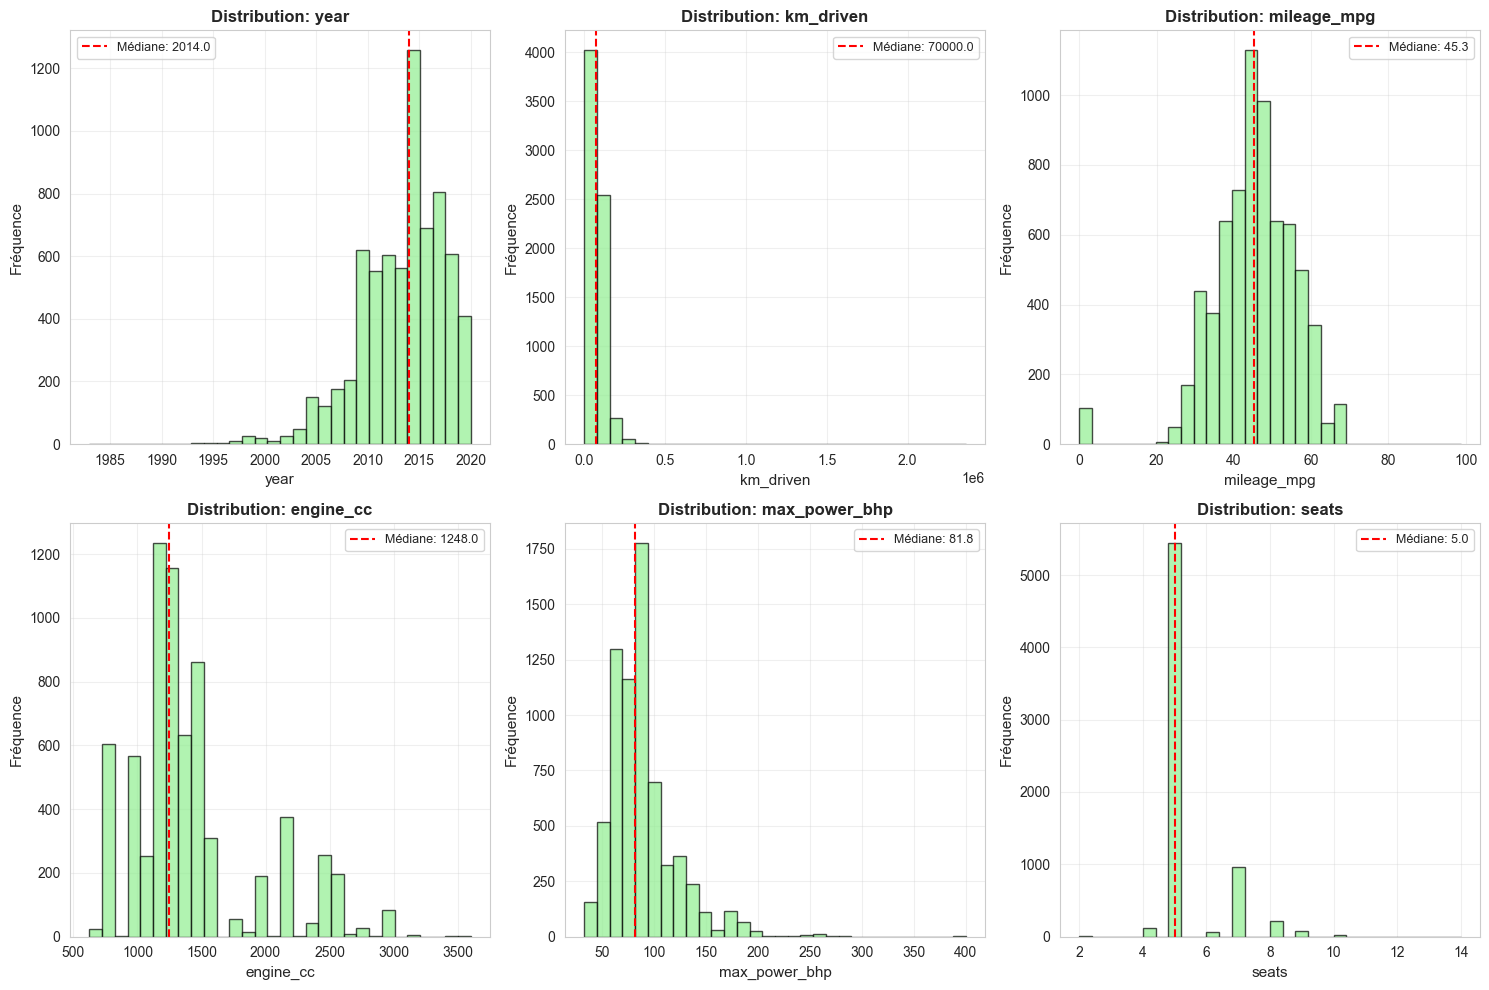

In [2663]:
# Histogrammes des variables numériques
print("📊 Distribution des variables numériques:")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    axes[idx].hist(df_clean[col].dropna(), bins=30, edgecolor='black', color='lightgreen', alpha=0.7)
    axes[idx].set_xlabel(col, fontsize=11)
    axes[idx].set_ylabel('Fréquence', fontsize=11)
    axes[idx].set_title(f'Distribution: {col}', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    
    # Ajouter médiane
    median_val = df_clean[col].median()
    axes[idx].axvline(median_val, color='red', linestyle='--', linewidth=1.5, 
                     label=f'Médiane: {median_val:.1f}')
    axes[idx].legend(fontsize=9)

plt.tight_layout()
plt.show()

📦 Boxplots des variables numériques (détection outliers):


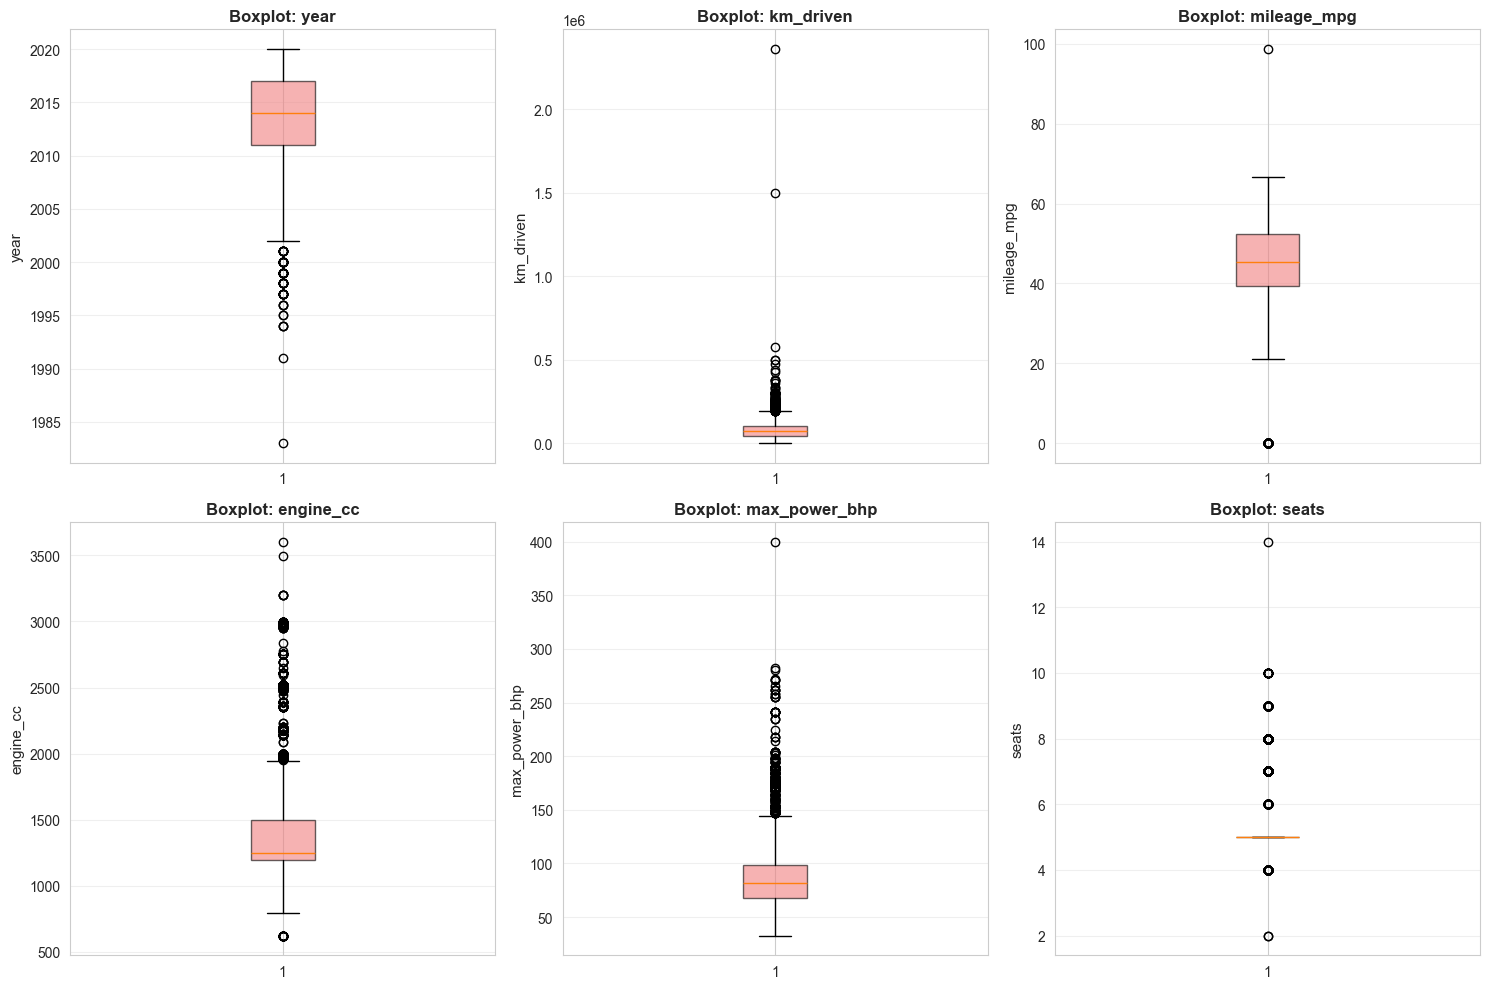

In [2664]:
# Boxplots des variables numériques
print("📦 Boxplots des variables numériques (détection outliers):")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features):
    axes[idx].boxplot(df_clean[col].dropna(), vert=True, patch_artist=True,
                     boxprops=dict(facecolor='lightcoral', alpha=0.6))
    axes[idx].set_ylabel(col, fontsize=11)
    axes[idx].set_title(f'Boxplot: {col}', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [2665]:
# # Variables numériques (sélection manuelle pour contrôle pédagogique)
# numerical_features = ['year', 'km_driven', 'mileage_mpg', 'engine_cc', 'max_power_bhp', 'seats']

# # Variables catégorielles (sélection manuelle)
# categorical_features = ['brand', 'owner', 'fuel', 'seller_type', 'transmission']


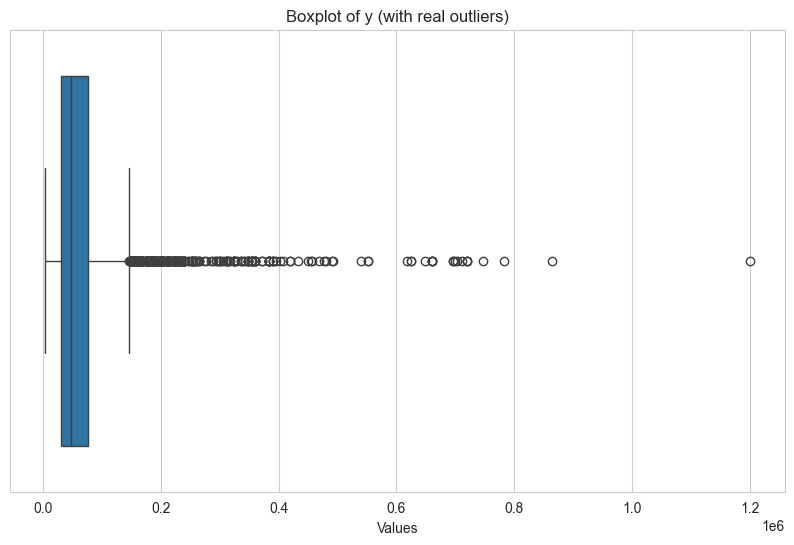

[np.float64(1200000.0),
 np.float64(864000.0),
 np.float64(782760.0),
 np.float64(746760.0),
 np.float64(720000.0),
 np.float64(710760.0),
 np.float64(702000.0),
 np.float64(699600.0),
 np.float64(696000.0),
 np.float64(660000.0),
 np.float64(648000.0),
 np.float64(624000.0),
 np.float64(618000.0),
 np.float64(552000.0),
 np.float64(540000.0),
 np.float64(492000.0),
 np.float64(490800.0),
 np.float64(480000.0),
 np.float64(477000.0),
 np.float64(468000.0),
 np.float64(456000.0),
 np.float64(454800.0),
 np.float64(450000.0),
 np.float64(432000.0),
 np.float64(420000.0),
 np.float64(408000.0),
 np.float64(402000.0),
 np.float64(396000.0),
 np.float64(390120.0),
 np.float64(390000.0),
 np.float64(384000.0),
 np.float64(372000.0),
 np.float64(360000.0),
 np.float64(354000.0),
 np.float64(352800.0),
 np.float64(348000.0),
 np.float64(342000.0),
 np.float64(339000.0),
 np.float64(336000.0),
 np.float64(330000.0),
 np.float64(325320.0),
 np.float64(324000.0),
 np.float64(318000.0),
 np.float6

In [2666]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x=df_clean['price'], showfliers=True)  # showfliers=True keeps the real outliers
plt.title("Boxplot of y (with real outliers)")
plt.xlabel("Values")
plt.show()
sorted(df_clean['price'].unique(),reverse=True)

In [2667]:
from collections import Counter

years = df_clean['price'].tolist()
# Count occurrences
year_counts = Counter(years)

print(year_counts)

Counter({36000.0: 212, 42000.0: 200, 48000.0: 170, 72000.0: 167, 30000.0: 167, 60000.0: 161, 66000.0: 158, 54000.0: 147, 24000.0: 144, 78000.0: 144, 84000.0: 129, 18000.0: 122, 90000.0: 105, 96000.0: 79, 26400.0: 74, 38400.0: 72, 14400.0: 68, 21600.0: 64, 39000.0: 63, 102000.0: 62, 114000.0: 61, 32400.0: 60, 108000.0: 60, 33600.0: 56, 20400.0: 54, 25200.0: 54, 19200.0: 53, 27000.0: 52, 63000.0: 52, 51000.0: 52, 37200.0: 51, 45600.0: 50, 27599.879999999997: 49, 15600.0: 47, 33000.0: 47, 12000.0: 47, 28800.0: 46, 45000.0: 45, 16800.0: 44, 31200.0: 44, 34800.0: 43, 43200.0: 43, 57600.0: 42, 120000.0: 40, 39600.0: 39, 75000.0: 39, 68400.0: 39, 22800.0: 38, 13200.0: 38, 44400.0: 37, 50400.0: 37, 46800.0: 36, 57000.0: 36, 49199.88: 36, 40800.0: 35, 55199.88: 35, 51600.0: 35, 69000.0: 33, 21000.0: 33, 16200.0: 33, 74400.0: 33, 132000.0: 32, 9600.0: 32, 126000.0: 32, 81000.0: 31, 61199.88: 30, 15000.0: 30, 69600.0: 29, 63600.0: 29, 8400.0: 28, 87000.0: 28, 25800.0: 28, 10800.0: 28, 28200.0: 26

In [2668]:
km = df_clean['km_driven'].tolist()
# Count occurrences
km_counts = Counter(km)

print(km_counts)

Counter({120000: 511, 70000: 433, 80000: 421, 60000: 392, 50000: 355, 100000: 323, 90000: 318, 40000: 284, 110000: 263, 30000: 212, 35000: 193, 25000: 171, 20000: 159, 15000: 119, 10000: 110, 5000: 66, 150000: 49, 65000: 48, 140000: 43, 45000: 39, 75000: 32, 200000: 30, 55000: 25, 170000: 24, 85000: 24, 160000: 23, 72000: 22, 27000: 22, 52000: 22, 56000: 22, 48000: 20, 46000: 20, 28000: 19, 125000: 19, 77000: 18, 32000: 18, 17000: 18, 22000: 18, 43000: 18, 67000: 17, 175000: 16, 68000: 16, 53000: 16, 42000: 16, 38000: 16, 39000: 16, 18000: 16, 26000: 16, 29000: 16, 58000: 16, 95000: 15, 130000: 15, 105000: 15, 57000: 15, 31000: 15, 62000: 15, 76000: 14, 135000: 14, 44000: 14, 19000: 14, 14000: 14, 250000: 14, 23000: 14, 64000: 13, 12000: 13, 13000: 13, 47000: 13, 33000: 13, 190000: 13, 74000: 13, 155000: 13, 82000: 13, 69000: 12, 37000: 12, 54000: 12, 24000: 12, 98000: 12, 96000: 12, 63000: 11, 78000: 11, 93000: 11, 34000: 11, 180000: 11, 97000: 11, 86000: 10, 108000: 10, 7000: 10, 210

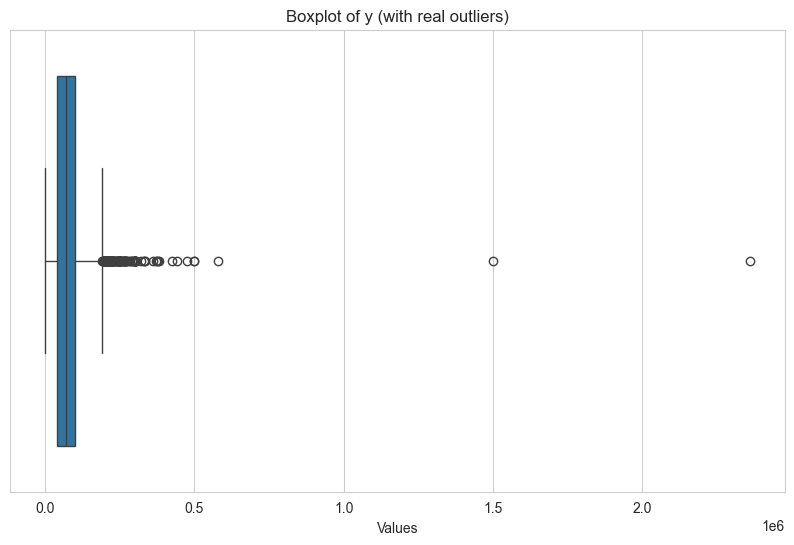

[np.int64(2360457),
 np.int64(1500000),
 np.int64(577414),
 np.int64(500000),
 np.int64(475000),
 np.int64(440000),
 np.int64(426000),
 np.int64(380000),
 np.int64(376412),
 np.int64(375000),
 np.int64(370000),
 np.int64(360003),
 np.int64(334000),
 np.int64(330000),
 np.int64(320000),
 np.int64(305000),
 np.int64(300000),
 np.int64(298000),
 np.int64(291977),
 np.int64(291000),
 np.int64(290000),
 np.int64(285000),
 np.int64(280000),
 np.int64(275000),
 np.int64(271000),
 np.int64(270000),
 np.int64(265000),
 np.int64(264000),
 np.int64(260000),
 np.int64(255000),
 np.int64(250000),
 np.int64(248200),
 np.int64(248119),
 np.int64(248000),
 np.int64(246000),
 np.int64(242000),
 np.int64(240000),
 np.int64(239451),
 np.int64(231438),
 np.int64(230000),
 np.int64(227000),
 np.int64(225000),
 np.int64(222300),
 np.int64(221889),
 np.int64(220000),
 np.int64(219000),
 np.int64(218463),
 np.int64(218000),
 np.int64(217000),
 np.int64(216000),
 np.int64(215000),
 np.int64(214000),
 np.int64(

In [2669]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x=df_clean['km_driven'], showfliers=True)  # showfliers=True keeps the real outliers
plt.title("Boxplot of y (with real outliers)")
plt.xlabel("Values")
plt.show()
sorted(df_clean['km_driven'].unique(),reverse=True)

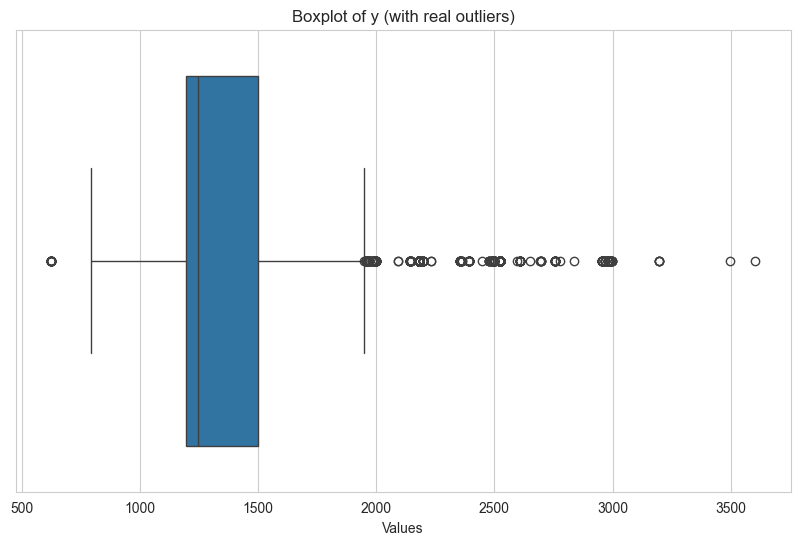

In [2670]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x=df_clean['engine_cc'], showfliers=True)  # showfliers=True keeps the real outliers
plt.title("Boxplot of y (with real outliers)")
plt.xlabel("Values")
plt.show()
#sorted(df_clean['engine_cc'].unique(),reverse=True)

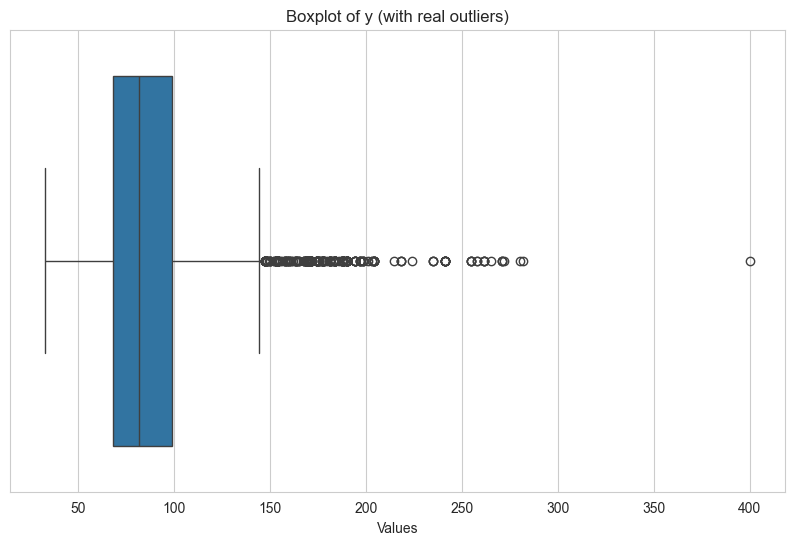

[np.float64(400.0),
 np.float64(282.0),
 np.float64(280.0),
 np.float64(272.0),
 np.float64(270.9),
 np.float64(265.0),
 np.float64(261.4),
 np.float64(258.0),
 np.float64(254.8),
 np.float64(254.79),
 np.float64(241.4),
 np.float64(241.0),
 np.float64(235.0),
 np.float64(224.0),
 np.float64(218.0),
 np.float64(214.56),
 np.float64(204.0),
 np.float64(203.2),
 np.float64(203.0),
 np.float64(201.1),
 np.float64(198.5),
 np.float64(198.25),
 np.float64(197.2),
 np.float64(197.0),
 np.float64(194.4),
 np.float64(194.3),
 np.float64(194.0),
 np.float64(190.0),
 np.float64(189.3),
 np.float64(189.0),
 np.float64(188.0),
 np.float64(187.74),
 np.float64(187.7),
 np.float64(187.4),
 np.float64(186.0),
 np.float64(184.0),
 np.float64(183.0),
 np.float64(181.04),
 np.float64(181.0),
 np.float64(179.5),
 np.float64(178.0),
 np.float64(177.6),
 np.float64(177.5),
 np.float64(177.46),
 np.float64(177.0),
 np.float64(175.56),
 np.float64(175.0),
 np.float64(174.57),
 np.float64(174.5),
 np.float64(

In [2671]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x=df_clean['max_power_bhp'], showfliers=True)  # showfliers=True keeps the real outliers
plt.title("Boxplot of y (with real outliers)")
plt.xlabel("Values")
plt.show()
sorted(df_clean['max_power_bhp'].unique(),reverse=True)

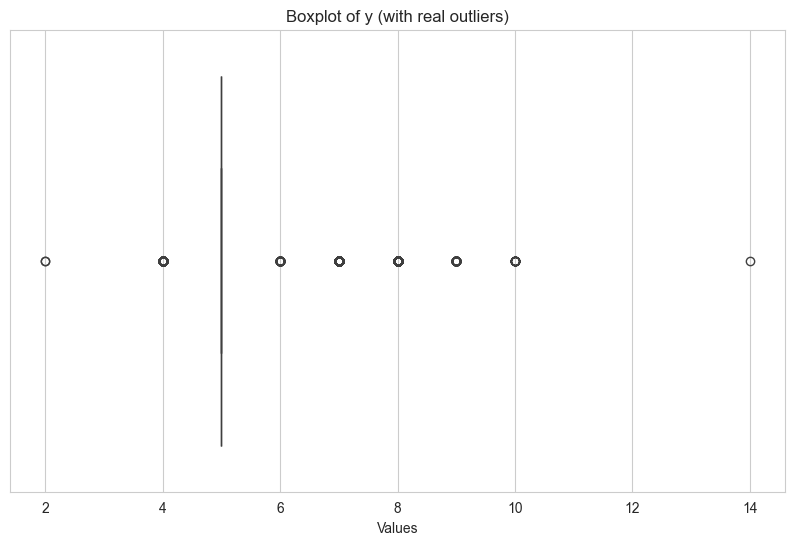

In [2672]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x=df_clean['seats'], showfliers=True)  # showfliers=True keeps the real outliers
plt.title("Boxplot of y (with real outliers)")
plt.xlabel("Values")
plt.show()
#sorted(df_clean['seats'].unique(),reverse=True)

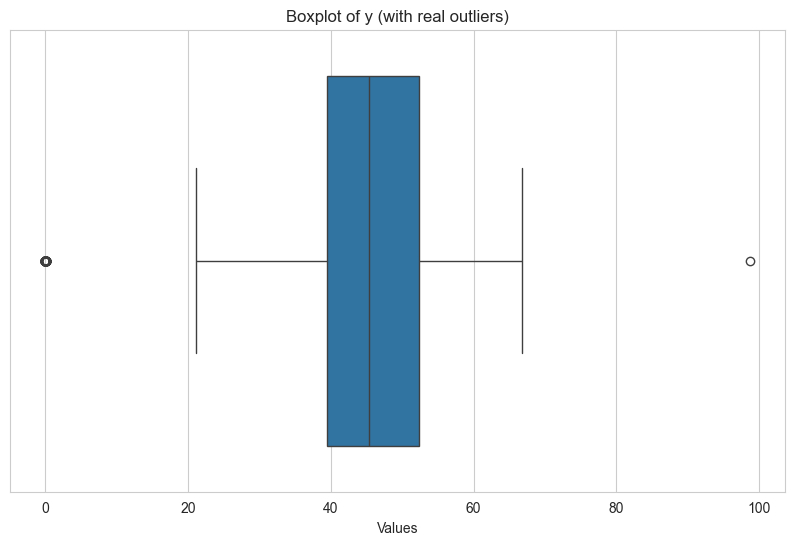

[np.float64(98.7),
 np.float64(66.75),
 np.float64(66.0),
 np.float64(64.94),
 np.float64(64.4),
 np.float64(64.1),
 np.float64(62.97),
 np.float64(62.5),
 np.float64(61.6),
 np.float64(61.34),
 np.float64(61.1),
 np.float64(60.7),
 np.float64(60.62),
 np.float64(60.16),
 np.float64(59.94),
 np.float64(59.84),
 np.float64(59.78),
 np.float64(59.7),
 np.float64(59.5),
 np.float64(59.22),
 np.float64(59.16),
 np.float64(59.0),
 np.float64(58.78),
 np.float64(58.75),
 np.float64(58.28),
 np.float64(58.03),
 np.float64(57.62),
 np.float64(57.56),
 np.float64(57.34),
 np.float64(57.1),
 np.float64(56.88),
 np.float64(56.5),
 np.float64(56.4),
 np.float64(56.28),
 np.float64(56.16),
 np.float64(56.1),
 np.float64(56.03),
 np.float64(55.94),
 np.float64(55.56),
 np.float64(55.44),
 np.float64(55.38),
 np.float64(55.22),
 np.float64(55.0),
 np.float64(54.75),
 np.float64(54.66),
 np.float64(54.53),
 np.float64(54.28),
 np.float64(54.25),
 np.float64(54.12),
 np.float64(54.06),
 np.float64(53.9

In [2673]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x=df_clean['mileage_mpg'], showfliers=True)  # showfliers=True keeps the real outliers
plt.title("Boxplot of y (with real outliers)")
plt.xlabel("Values")
plt.show()
sorted(df_clean['mileage_mpg'].unique(),reverse=True)

## 2.2 Vérification de la distribution des variables

🔗 Matrice de corrélation des variables numériques:

📊 Corrélation avec le prix:
price            1.000000
max_power_bhp    0.689718
engine_cc        0.444895
year             0.433401
seats            0.163558
mileage_mpg     -0.067128
km_driven       -0.166018
Name: price, dtype: float64


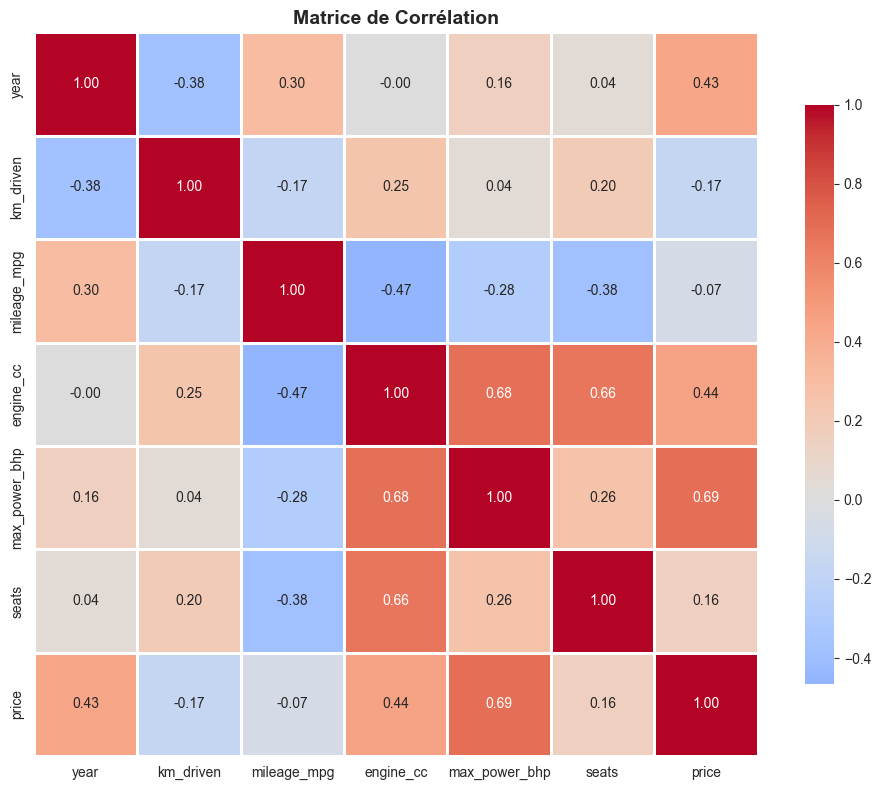


✅ Variables les plus corrélées avec le prix:
   - max_power_bhp: 0.690
   - engine_cc: 0.445
   - year: 0.433


In [2674]:
# Matrice de corrélation
print("🔗 Matrice de corrélation des variables numériques:")

# Calculer la corrélation avec la variable cible
correlation_matrix = df_clean[numerical_features + [target]].corr()
correlations_with_target = correlation_matrix[target].sort_values(ascending=False)

print("\n📊 Corrélation avec le prix:")
print(correlations_with_target)

# Visualisation de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Identifier les variables les plus corrélées
print("\n✅ Variables les plus corrélées avec le prix:")
top_corr = correlations_with_target.drop(target).abs().sort_values(ascending=False).head(3)
for var, corr in top_corr.items():
    print(f"   - {var}: {correlations_with_target[var]:.3f}")

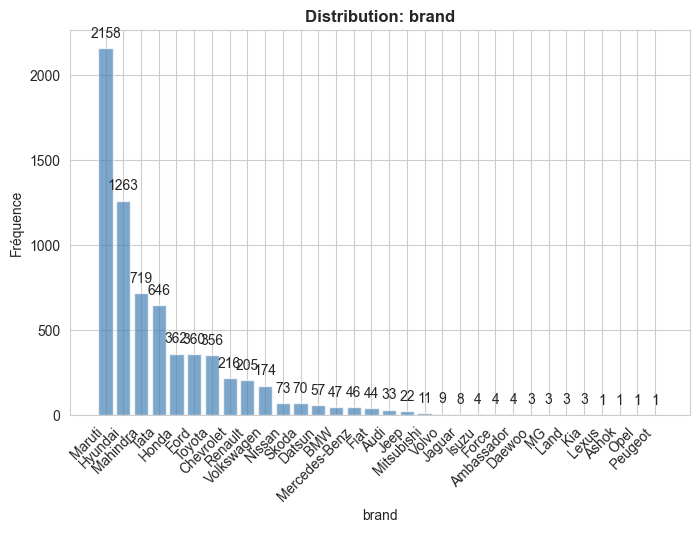

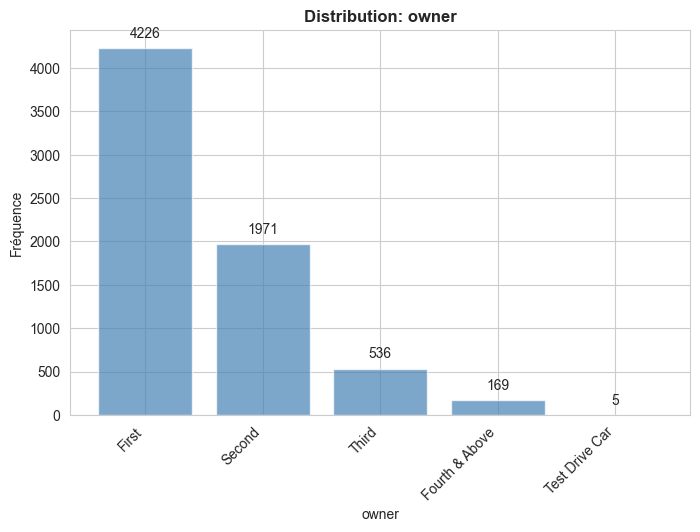

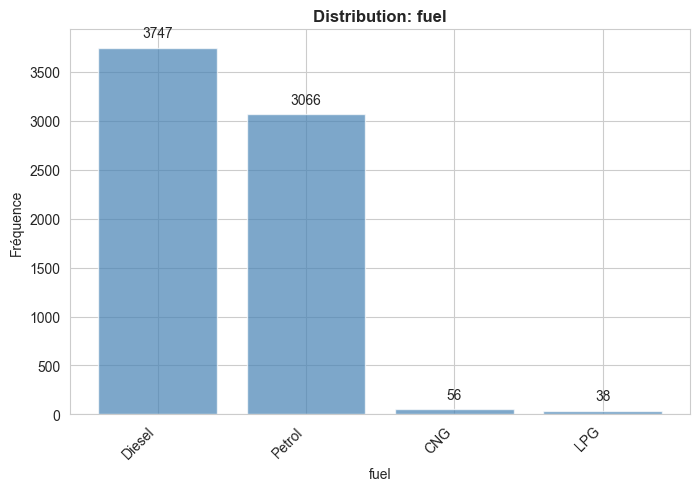

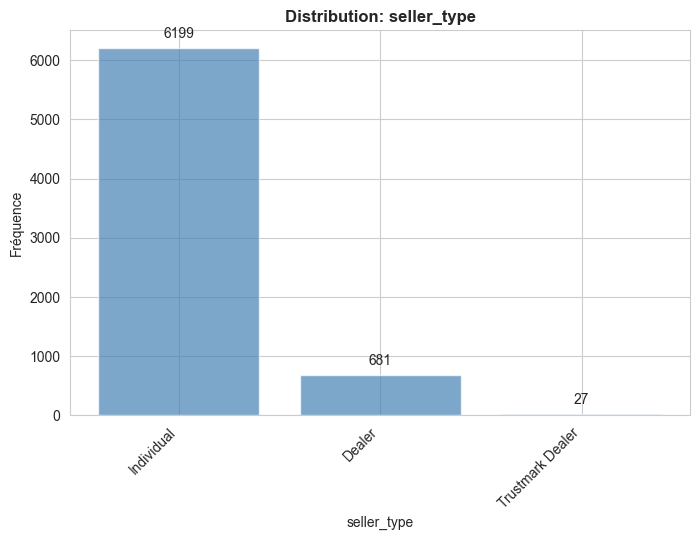

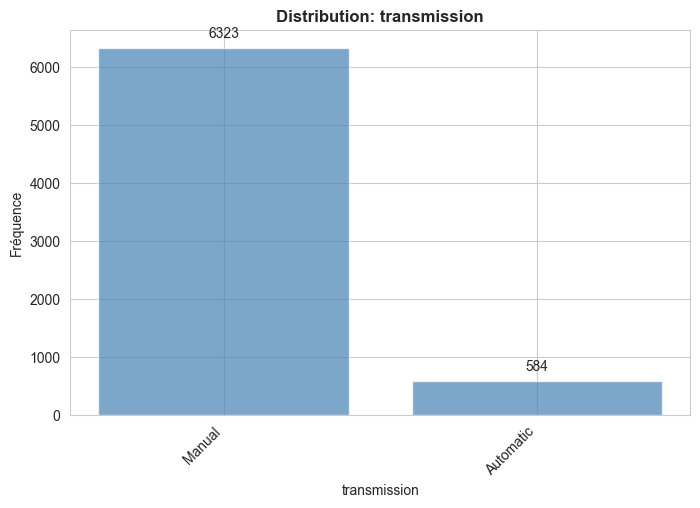

In [2675]:
for col in categorical_features:
    plt.figure(figsize=(8,5))
    value_counts = df_clean[col].value_counts()
    plt.bar(range(len(value_counts)), value_counts.values, color='steelblue', alpha=0.7)
    plt.xticks(range(len(value_counts)), value_counts.index, rotation=45, ha='right')
    plt.xlabel(col)
    plt.ylabel('Fréquence')
    plt.title(f'Distribution: {col}', fontweight='bold')
    
    for i, v in enumerate(value_counts.values):
        plt.text(i, v + max(value_counts.values)*0.02, str(v), ha='center', va='bottom')
    
    plt.show()


## 2.3 Analyse de l'impact de la marque (company) sur le prix

**Note importante:** La marque de la voiture est une feature catégorielle clé qui sera encodée avec OneHotEncoder

🚗 ANALYSE DE L'IMPACT DE LA MARQUE (COMPANY) SUR LE PRIX

📊 Top 10 marques par prix moyen:
               Nombre     Prix_Moyen  Prix_Médian     Écart_Type
brand                                                           
Lexus               1  618000.000000     618000.0            NaN
Volvo               9  484333.333333     408000.0  321732.031355
BMW                47  332476.595745     258000.0  225179.497689
Jaguar              8  329790.000000     320160.0   56642.424282
Land                3  326000.000000     240000.0  186515.414913
Audi               33  290683.625455     240000.0  169858.939787
Mercedes-Benz      46  270401.739130     227040.0  165235.824140
Jeep               22  214707.267273     198000.0   66878.270973
MG                  3  214000.000000     210000.0   12489.995997
Isuzu               4  210300.000000     189000.0   85502.982404

📉 Bottom 5 marques par prix moyen:
            Nombre    Prix_Moyen  Prix_Médian    Écart_Type
brand                            

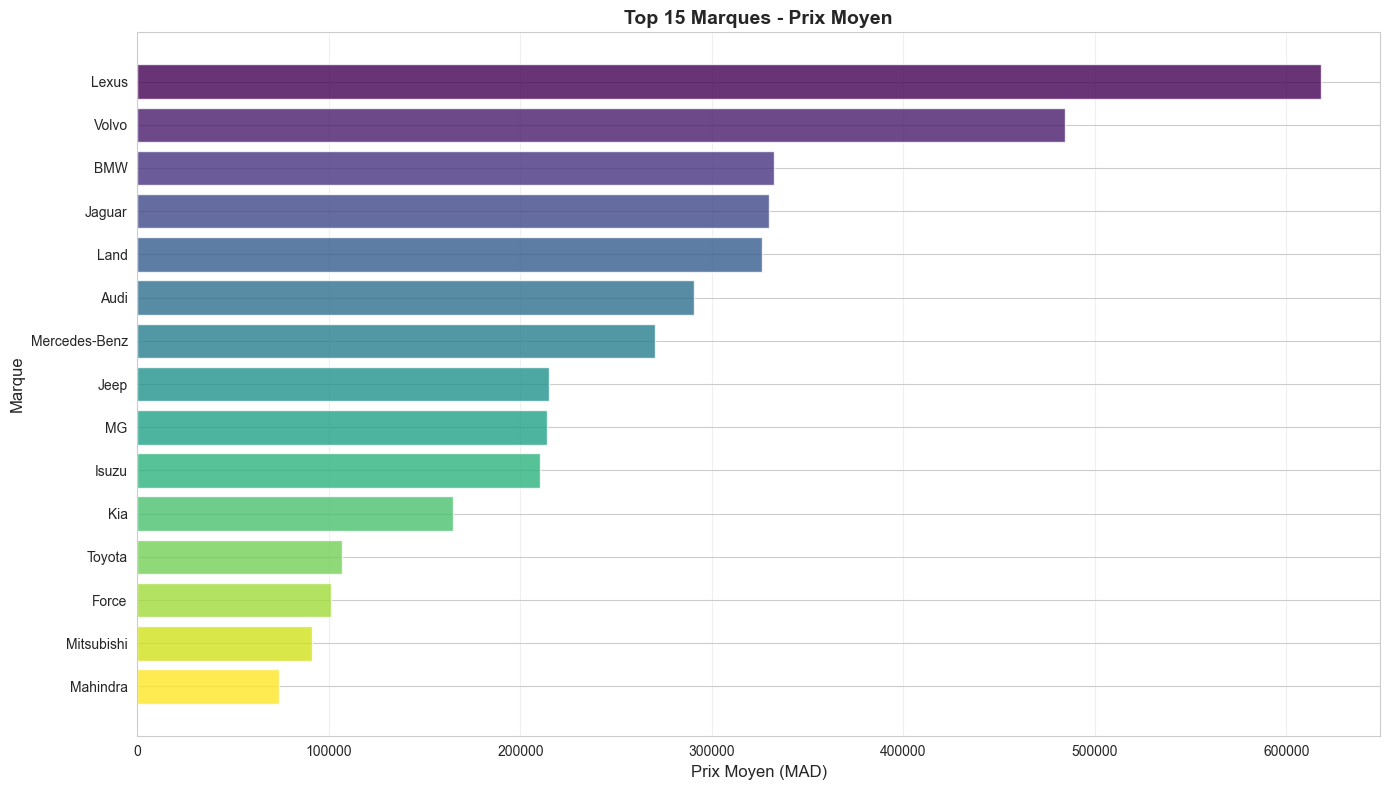


📊 Distribution des prix pour les 8 marques principales:


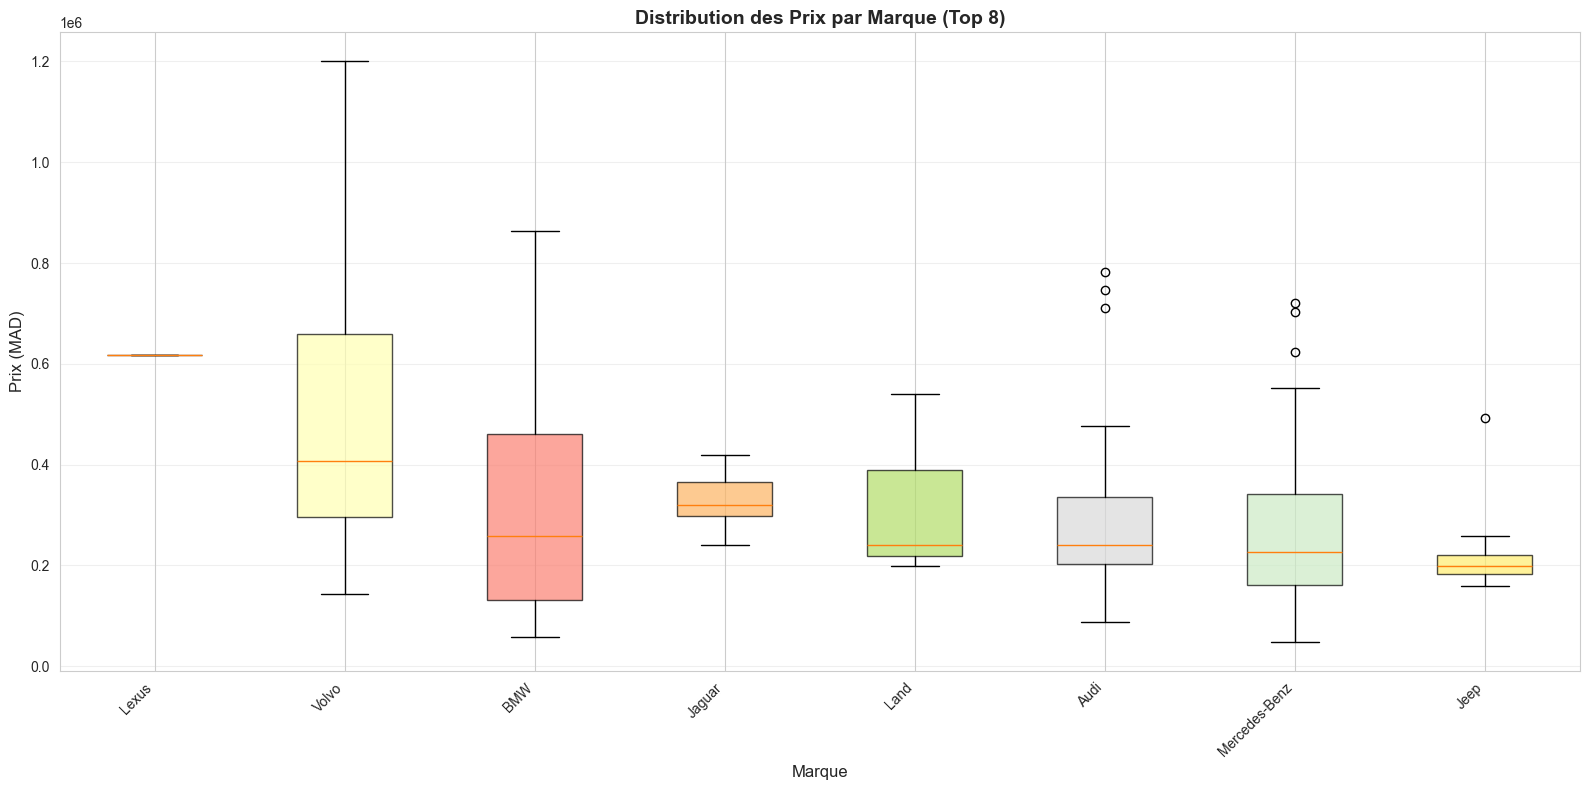


💡 INSIGHTS:
   - Marque la plus chère: Lexus (moyenne: 618,000.00 MAD)
   - Marque la moins chère: Peugeot (moyenne: 6,840.00 MAD)
   - Nombre total de marques: 32
   - Variation de prix entre marques: 611,160.00 MAD

✅ La marque ('company') sera encodée avec OneHotEncoder pour capturer son impact sur le prix!


In [2676]:
# Analyse de l'impact de la marque sur le prix
print("🚗 ANALYSE DE L'IMPACT DE LA MARQUE (COMPANY) SUR LE PRIX")
print("="*80)

# Calculer le prix moyen par marque
company_stats = df_clean.groupby('brand')['price'].agg(['count', 'mean', 'median', 'std']).sort_values('mean', ascending=False)
company_stats.columns = ['Nombre', 'Prix_Moyen', 'Prix_Médian', 'Écart_Type']

print(f"\n📊 Top 10 marques par prix moyen:")
print(company_stats.head(10).to_string())

print(f"\n📉 Bottom 5 marques par prix moyen:")
print(company_stats.tail(5).to_string())

# Visualisation: Prix moyen par marque (Top 15)
plt.figure(figsize=(14, 8))
top_brands = company_stats.head(15)
colors = plt.cm.viridis(np.linspace(0, 1, len(top_brands)))
plt.barh(range(len(top_brands)), top_brands['Prix_Moyen'], color=colors, alpha=0.8)
plt.yticks(range(len(top_brands)), top_brands.index)
plt.xlabel('Prix Moyen (MAD)', fontsize=12)
plt.ylabel('Marque', fontsize=12)
plt.title('Top 15 Marques - Prix Moyen', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Visualisation: Distribution des prix par marque (Top 8)
print(f"\n📊 Distribution des prix pour les 8 marques principales:")
top_8_brands = company_stats.head(8).index
df_top_brands = df_clean[df_clean['brand'].isin(top_8_brands)]

plt.figure(figsize=(16, 8))
brands_sorted = company_stats.head(8).index.tolist()
data_to_plot = [df_clean[df_clean['brand'] == brand]['price'].values for brand in brands_sorted]
bp = plt.boxplot(data_to_plot, labels=brands_sorted, patch_artist=True)

# Colorier les boxplots
for patch, color in zip(bp['boxes'], plt.cm.Set3(np.linspace(0, 1, len(brands_sorted)))):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.xlabel('Marque', fontsize=12)
plt.ylabel('Prix (MAD)', fontsize=12)
plt.title('Distribution des Prix par Marque (Top 8)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"\n💡 INSIGHTS:")
print(f"   - Marque la plus chère: {company_stats.index[0]} (moyenne: {company_stats.iloc[0]['Prix_Moyen']:,.2f} MAD)")
print(f"   - Marque la moins chère: {company_stats.index[-1]} (moyenne: {company_stats.iloc[-1]['Prix_Moyen']:,.2f} MAD)")
print(f"   - Nombre total de marques: {len(company_stats)}")
print(f"   - Variation de prix entre marques: {company_stats['Prix_Moyen'].max() - company_stats['Prix_Moyen'].min():,.2f} MAD")
print(f"\n✅ La marque ('company') sera encodée avec OneHotEncoder pour capturer son impact sur le prix!")
print("="*80)

---

# 3️⃣ PRÉTRAITEMENT

## 3.1 Création de nouvelles features (Feature Engineering)

In [2677]:
# Créer des features pertinentes pour améliorer la prédiction
print("🔧 Création de nouvelles features:")

df_features = df_clean.copy()


# Feature : Ratio puissance/cylindrée (indicateur de performance)
df_features['power_per_cc'] = df_features['max_power_bhp'] / (df_features['engine_cc'] + 1)  # +1 pour éviter division par 0
print(f"   ✓ power_per_cc: ratio puissance/cylindrée")

# Mettre à jour la liste des features numériques
numerical_features_engineered = numerical_features + [ 'power_per_cc']
# Mettre à jour la liste des features catégorielles
categorical_features_engineered = categorical_features

print(f"\n✅ Features créées avec succès!")
print(f"   - Features numériques: {len(numerical_features_engineered)}")
print(f"   - Features catégorielles: {len(categorical_features_engineered)}")
print(f"   - Total features: {len(numerical_features_engineered) + len(categorical_features_engineered)}")

🔧 Création de nouvelles features:
   ✓ power_per_cc: ratio puissance/cylindrée

✅ Features créées avec succès!
   - Features numériques: 7
   - Features catégorielles: 5
   - Total features: 12


## 3.2 Traitement des outliers (valeurs aberrantes)

**Stratégie optimisée:** Appliquer des seuils métier spécifiques pour chaque variable

In [2678]:
df_features.isna().sum()

brand            0
year             0
owner            0
fuel             0
seller_type      0
transmission     0
km_driven        0
mileage_mpg      0
engine_cc        0
max_power_bhp    0
seats            0
price            0
power_per_cc     0
dtype: int64

In [2679]:
# Traitement des outliers avec seuils métier spécifiques
print("🔍 Traitement des outliers avec seuils métier:")

# Copier le dataframe pour traitement
df_clean_outliers = df_features.copy()
n_initial = len(df_clean_outliers)

print(f"\n📊 Dataset initial: {n_initial:,} lignes")
print("\n" + "="*80)

# 1. ENGINE_CC: Limiter à 2500cc (voitures standards)
print(f"\n1️⃣ ENGINE_CC (Cylindrée):")
print(f"   - Avant: min={df_clean_outliers['engine_cc'].min():.0f}, max={df_clean_outliers['engine_cc'].max():.0f}")
outliers_engine = df_clean_outliers['engine_cc'] > 2500
print(f"   - Outliers détectés (>2500cc): {outliers_engine.sum()} ({outliers_engine.sum()/n_initial*100:.2f}%)")
df_clean_outliers = df_clean_outliers[~outliers_engine]
print(f"   - Après: max={df_clean_outliers['engine_cc'].max():.0f} ✅")

# 2. MAX_POWER_BHP: Limiter à 200 bhp (voitures standards)
print(f"\n2️⃣ MAX_POWER_BHP (Puissance):")
print(f"   - Avant: min={df_clean_outliers['max_power_bhp'].min():.0f}, max={df_clean_outliers['max_power_bhp'].max():.0f}")
outliers_power = df_clean_outliers['max_power_bhp'] > 200
print(f"   - Outliers détectés (>200 bhp): {outliers_power.sum()} ({outliers_power.sum()/len(df_clean_outliers)*100:.2f}%)")
df_clean_outliers = df_clean_outliers[~outliers_power]
print(f"   - Après: max={df_clean_outliers['max_power_bhp'].max():.0f} ✅")

# 3. SEATS: Limiter à 7 sièges (exclure minibus 14 sièges)
print(f"\n3️⃣ SEATS (Nombre de sièges):")
print(f"   - Avant: min={df_clean_outliers['seats'].min():.0f}, max={df_clean_outliers['seats'].max():.0f}")
print(f"   - Distribution: {df_clean_outliers['seats'].value_counts().sort_index().to_dict()}")
outliers_seats = df_clean_outliers['seats'] > 7
print(f"   - Outliers détectés (>7 sièges): {outliers_seats.sum()} ({outliers_seats.sum()/len(df_clean_outliers)*100:.2f}%)")
df_clean_outliers = df_clean_outliers[~outliers_seats]
print(f"   - Après: max={df_clean_outliers['seats'].max():.0f} ✅")


# 4. KM_DRIVEN: Limiter à 200,000 km (usage raisonnable)
print(f"\n4️⃣ KM_DRIVEN (Kilométrage):")
print(f"   - Avant: min={df_clean_outliers['km_driven'].min():,.0f}, max={df_clean_outliers['km_driven'].max():,.0f}")
km_threshold = 200000

outliers_km = df_clean_outliers['km_driven'] > km_threshold
print(f"   - Outliers détectés (>{km_threshold:,} km): {outliers_km.sum()} ({outliers_km.sum()/len(df_clean_outliers)*100:.2f}%)")
df_clean_outliers = df_clean_outliers[~outliers_km]
print(f"   - Après: min={df_clean_outliers['km_driven'].min():,.0f}, max={df_clean_outliers['km_driven'].max():,.0f} ✅")

# 5. PRICE (Variable cible): Méthode IQR avec facteur 3.0
print(f"\n5️⃣ PRICE (Prix - Variable cible):")
Q1 = df_clean_outliers['price'].quantile(0.25)
Q3 = df_clean_outliers['price'].quantile(0.75)
IQR = Q3 - Q1
iqr_factor = 3.0
lower_bound = Q1 - iqr_factor * IQR
upper_bound = Q3 + iqr_factor * IQR

print(f"   - Q1 (25%): {Q1:,.2f} MAD")
print(f"   - Q3 (75%): {Q3:,.2f} MAD")
print(f"   - IQR: {IQR:,.2f} MAD")
print(f"   - Borne inférieure: {lower_bound:,.2f} MAD")
print(f"   - Borne supérieure: {upper_bound:,.2f} MAD")

outliers_price = (df_clean_outliers['price'] < lower_bound) | (df_clean_outliers['price'] > upper_bound)
print(f"   - Outliers prix détectés: {outliers_price.sum()} ({outliers_price.sum()/len(df_clean_outliers)*100:.2f}%)")
df_clean_outliers = df_clean_outliers[~outliers_price]
print(f"   - Après: min={df_clean_outliers['price'].min():,.2f}, max={df_clean_outliers['price'].max():,.2f} ✅")


# Résumé final
print("\n" + "="*80)
print(f"\n📋 RÉSUMÉ DU NETTOYAGE:")
n_final = len(df_clean_outliers)
n_removed = n_initial - n_final
print(f"   - Dataset initial: {n_initial:,} lignes")
print(f"   - Dataset final: {n_final:,} lignes")
print(f"   - Lignes supprimées: {n_removed:,} ({n_removed/n_initial*100:.2f}%)")
print(f"   - Données conservées: {n_final/n_initial*100:.2f}% ✅")

# Mettre à jour le dataframe
df_processed = df_clean_outliers.copy()

🔍 Traitement des outliers avec seuils métier:

📊 Dataset initial: 6,907 lignes


1️⃣ ENGINE_CC (Cylindrée):
   - Avant: min=624, max=3604
   - Outliers détectés (>2500cc): 320 (4.63%)
   - Après: max=2499 ✅

2️⃣ MAX_POWER_BHP (Puissance):
   - Avant: min=33, max=400
   - Outliers détectés (>200 bhp): 13 (0.20%)
   - Après: max=198 ✅

3️⃣ SEATS (Nombre de sièges):
   - Avant: min=4, max=14
   - Distribution: {4.0: 118, 5.0: 5415, 6.0: 56, 7.0: 737, 8.0: 201, 9.0: 29, 10.0: 17, 14.0: 1}
   - Outliers détectés (>7 sièges): 248 (3.77%)
   - Après: max=7 ✅

4️⃣ KM_DRIVEN (Kilométrage):
   - Avant: min=1, max=2,360,457
   - Outliers détectés (>200,000 km): 81 (1.28%)
   - Après: min=1, max=200,000 ✅

5️⃣ PRICE (Prix - Variable cible):
   - Q1 (25%): 28,800.00 MAD
   - Q3 (75%): 74,400.00 MAD
   - IQR: 45,600.00 MAD
   - Borne inférieure: -108,000.00 MAD
   - Borne supérieure: 211,200.00 MAD
   - Outliers prix détectés: 94 (1.51%)
   - Après: min=3,599.88, max=210,840.00 ✅


📋 RÉSUMÉ DU NETTO

📊 Comparaison avant/après traitement des outliers:


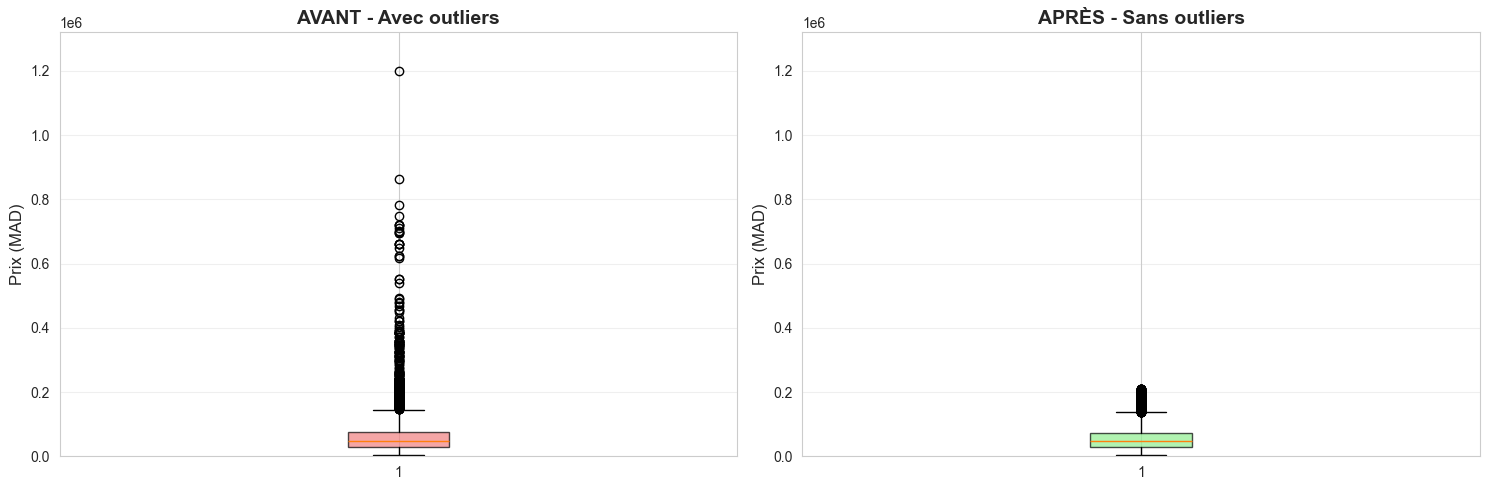

In [2680]:
# Visualiser l'effet du traitement des outliers
print("📊 Comparaison avant/après traitement des outliers:")

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Avant
axes[0].boxplot(df_features['price'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightcoral', alpha=0.7))
axes[0].set_ylabel('Prix (MAD)', fontsize=12)
axes[0].set_title('AVANT - Avec outliers', fontsize=14, fontweight='bold')
axes[0].set_ylim(0, df_features['price'].max() * 1.1)
axes[0].grid(True, alpha=0.3, axis='y')

# Après
axes[1].boxplot(df_processed['price'], vert=True, patch_artist=True,
                boxprops=dict(facecolor='lightgreen', alpha=0.7))
axes[1].set_ylabel('Prix (MAD)', fontsize=12)
axes[1].set_title('APRÈS - Sans outliers', fontsize=14, fontweight='bold')
axes[1].set_ylim(0, df_features['price'].max() * 1.1)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 3.3 Analyse de corrélation des features (Best Practice)

**Objectif:** Identifier les features les plus corrélées avec le prix pour sélection optimale

In [2681]:
# Analyse de corrélation après feature engineering
print("🔗 ANALYSE DE CORRÉLATION DES FEATURES")
print("="*80)

# Sélectionner uniquement les features numériques pour la corrélation
correlation_features = numerical_features_engineered + ['price']
df_corr = df_processed[correlation_features].copy()

# Calculer la matrice de corrélation
correlation_matrix = df_corr.corr()

# Extraire les corrélations avec le prix (variable cible)
price_correlations = correlation_matrix['price'].sort_values(ascending=False)

print("\n📊 CORRÉLATIONS AVEC LE PRIX (triées par importance):")
print("-"*80)
for feature, corr in price_correlations.items():
    if feature != 'price':
        # Interpréter la force de la corrélation
        if abs(corr) > 0.7:
            strength = "🔴 TRÈS FORTE"
        elif abs(corr) > 0.5:
            strength = "🟠 FORTE"
        elif abs(corr) > 0.3:
            strength = "🟡 MODÉRÉE"
        elif abs(corr) > 0.1:
            strength = "🟢 FAIBLE"
        else:
            strength = "⚪ TRÈS FAIBLE"
        
        print(f"{feature:<25} {corr:>8.4f}  {strength}")

print("="*80)

🔗 ANALYSE DE CORRÉLATION DES FEATURES

📊 CORRÉLATIONS AVEC LE PRIX (triées par importance):
--------------------------------------------------------------------------------
max_power_bhp               0.6313  🟠 FORTE
year                        0.6288  🟠 FORTE
engine_cc                   0.5034  🟠 FORTE
power_per_cc                0.3897  🟡 MODÉRÉE
seats                       0.3685  🟡 MODÉRÉE
mileage_mpg                 0.0763  ⚪ TRÈS FAIBLE
km_driven                  -0.2662  🟢 FAIBLE



📊 Matrice de corrélation visuelle:


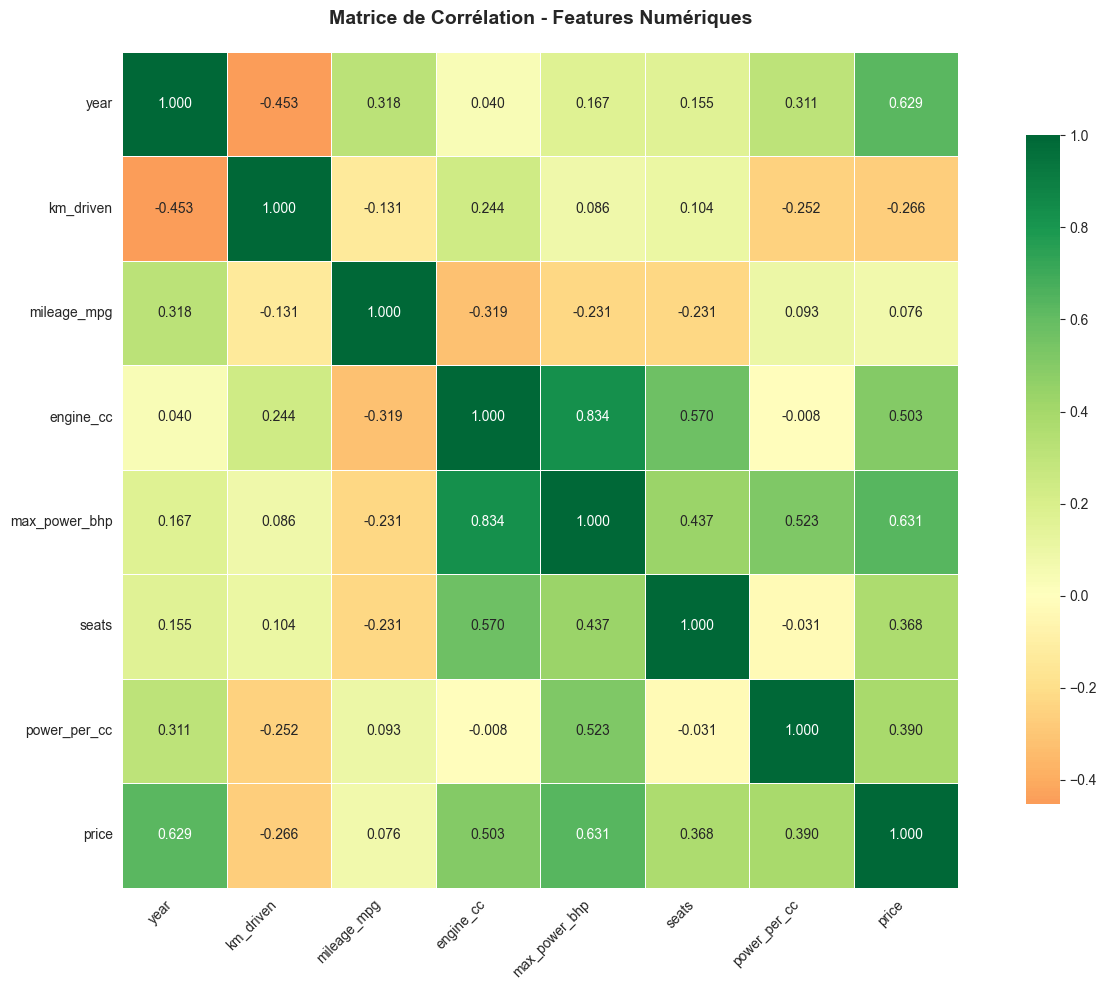

In [2682]:
# Visualisation de la matrice de corrélation
print("\n📊 Matrice de corrélation visuelle:")

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.3f', 
            cmap='RdYlGn',  # Rouge = négatif, Vert = positif
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation - Features Numériques', fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [2683]:
# Sélection des meilleures features basée sur la corrélation
print("\n🎯 SÉLECTION DES FEATURES (Best Practice):")
print("="*80)

# Critère: Corrélation absolue > 0.1 (significative)
correlation_threshold = 0.1
selected_features = price_correlations[
    (price_correlations.abs() > correlation_threshold) & 
    (price_correlations.index != 'price')
].index.tolist()

# Identifier les features à exclure (corrélation trop faible)
excluded_features = [f for f in numerical_features_engineered if f not in selected_features]

print(f"\n✅ FEATURES SÉLECTIONNÉES (|corr| > {correlation_threshold}):")
print(f"   Total: {len(selected_features)}/{len(numerical_features_engineered)} features numériques")
print("\n   Liste:")
for feature in selected_features:
    corr = price_correlations[feature]
    print(f"      • {feature:<25} → corrélation = {corr:>7.4f}")

if excluded_features:
    print(f"\n❌ FEATURES EXCLUES (|corr| ≤ {correlation_threshold}):")
    for feature in excluded_features:
        corr = price_correlations[feature]
        print(f"      • {feature:<25} → corrélation = {corr:>7.4f}")
else:
    print(f"\n✅ Toutes les features numériques sont pertinentes!")

# Mettre à jour la liste finale des features numériques
numerical_features_final = selected_features

print(f"\n📋 FEATURES FINALES POUR LE MODÈLE:")
print(f"   - Features numériques: {len(numerical_features_final)}")
print(f"   - Features catégorielles: {len(categorical_features_engineered)}")
print(f"   - Total: {len(numerical_features_final) + len(categorical_features_engineered)}")
print("="*80)


🎯 SÉLECTION DES FEATURES (Best Practice):

✅ FEATURES SÉLECTIONNÉES (|corr| > 0.1):
   Total: 6/7 features numériques

   Liste:
      • max_power_bhp             → corrélation =  0.6313
      • year                      → corrélation =  0.6288
      • engine_cc                 → corrélation =  0.5034
      • power_per_cc              → corrélation =  0.3897
      • seats                     → corrélation =  0.3685
      • km_driven                 → corrélation = -0.2662

❌ FEATURES EXCLUES (|corr| ≤ 0.1):
      • mileage_mpg               → corrélation =  0.0763

📋 FEATURES FINALES POUR LE MODÈLE:
   - Features numériques: 6
   - Features catégorielles: 5
   - Total: 11


## 3.4 Préparation des données pour le modèle

In [2684]:
# Séparer X (features) et y (target)
print("📦 Préparation des données pour la modélisation:")

# Features (X) - Utiliser les features sélectionnées après analyse de corrélation
X = df_processed[numerical_features_final + categorical_features_engineered]

# Target (y)
y = df_processed['price']

print(f"   - X (features): {X.shape}")
print(f"   - y (target): {y.shape}")
print(f"\n   Features numériques ({len(numerical_features_final)}): {numerical_features_final}")
print(f"   Features catégorielles ({len(categorical_features_engineered)}): {categorical_features_engineered}")

📦 Préparation des données pour la modélisation:
   - X (features): (6151, 11)
   - y (target): (6151,)

   Features numériques (6): ['max_power_bhp', 'year', 'engine_cc', 'power_per_cc', 'seats', 'km_driven']
   Features catégorielles (5): ['brand', 'owner', 'fuel', 'seller_type', 'transmission']


In [2685]:
X

,max_power_bhp,year,engine_cc,power_per_cc,seats,km_driven,brand,owner,fuel,seller_type,transmission
0,74.00,2014,1248.0,0.059247,5.0,145500,Maruti,First,Diesel,Individual,Manual
1,103.52,2014,1498.0,0.069059,5.0,120000,Skoda,Second,Diesel,Individual,Manual
2,78.00,2006,1497.0,0.052069,5.0,140000,Honda,Third,Petrol,Individual,Manual
3,90.00,2010,1396.0,0.064424,5.0,127000,Hyundai,First,Diesel,Individual,Manual
4,88.20,2007,1298.0,0.067898,5.0,120000,Maruti,First,Petrol,Individual,Manual
...,...,...,...,...,...,...,...,...,...,...,...
6921,67.10,2013,998.0,0.067167,5.0,50000,Maruti,Second,Petrol,Individual,Manual
6922,88.73,2014,1396.0,0.063515,5.0,80000,Hyundai,Second,Diesel,Individual,Manual
6923,82.85,2013,1197.0,0.069157,5.0,110000,Hyundai,First,Petrol,Individual,Manual
6924,110.00,2007,1493.0,0.073628,5.0,119000,Hyundai,Fourth & Above,Diesel,Individual,Manual


In [2686]:
# Split Train/Test (70/30)
print("\n🔀 Séparation Train/Test (70/30):")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.30, 
    random_state=42
)

print(f"   ✅ Séparation effectuée!")
print(f"   - Training set: {X_train.shape[0]:,} lignes ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   - Test set: {X_test.shape[0]:,} lignes ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\n   Prix moyen - Train: {y_train.mean():,.2f} MAD")
print(f"   Prix moyen - Test: {y_test.mean():,.2f} MAD")


🔀 Séparation Train/Test (70/30):
   ✅ Séparation effectuée!
   - Training set: 4,305 lignes (70.0%)
   - Test set: 1,846 lignes (30.0%)

   Prix moyen - Train: 54,307.85 MAD
   Prix moyen - Test: 53,703.49 MAD


## 3.5/ 3.6 Encodage des variables catégorielles (OneHotEncoder) Standardisation des variables numériques

**Note pédagogique:** Nous utilisons un Pipeline pour combiner:
- OneHotEncoder pour les variables catégorielles
- StandardScaler pour les variables numériques (sélectionnées par analyse de corrélation)

In [2687]:
# Créer le preprocessor avec ColumnTransformer
print("🔧 Création du pipeline de prétraitement:")

# Pipeline de prétraitement avec features sélectionnées
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_final),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features_engineered)
    ],
    remainder='drop'
)

print("   ✅ Preprocessor créé avec succès!")
print(f"   - Transformation numérique: StandardScaler sur {len(numerical_features_final)} features")
print(f"   - Transformation catégorielle: OneHotEncoder sur {len(categorical_features_engineered)} features")
print(f"   - handle_unknown='ignore': gère les catégories inconnues")
print(f"\n   💡 Features sélectionnées par analyse de corrélation (Best Practice)")

🔧 Création du pipeline de prétraitement:
   ✅ Preprocessor créé avec succès!
   - Transformation numérique: StandardScaler sur 6 features
   - Transformation catégorielle: OneHotEncoder sur 5 features
   - handle_unknown='ignore': gère les catégories inconnues

   💡 Features sélectionnées par analyse de corrélation (Best Practice)


---

# 4️⃣ MODÉLISATION

## 4.1 Entraîner un RandomForestRegressor

In [2688]:
# Créer le pipeline complet: Preprocessing + Modèle
print("🌲 Création du modèle RandomForestRegressor:")

# Pipeline complet
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(
        n_estimators=200,        # Nombre d'arbres (augmenté pour meilleure performance)
        max_depth=18,            # Profondeur maximale (optimisé)
        min_samples_split=10,    # Min échantillons pour split (régularisation)
        min_samples_leaf=4,      # Min échantillons dans feuille (régularisation)
        max_features='sqrt',     # Features à considérer par split
        random_state=42,         # Reproductibilité
        n_jobs=-1,              # Utiliser tous les CPU
        verbose=0
    ))
])

print("   ✅ Pipeline créé avec succès!")
print(f"\n   🎯 Hyperparamètres du RandomForest:")
print(f"   - n_estimators: 200 (nombre d'arbres)")
print(f"   - max_depth: 18 (profondeur maximale)")
print(f"   - min_samples_split: 10 (régularisation)")
print(f"   - min_samples_leaf: 4 (régularisation)")
print(f"   - max_features: 'sqrt' (√n_features)")
print(f"   - random_state: 42 (reproductibilité)")

🌲 Création du modèle RandomForestRegressor:
   ✅ Pipeline créé avec succès!

   🎯 Hyperparamètres du RandomForest:
   - n_estimators: 200 (nombre d'arbres)
   - max_depth: 18 (profondeur maximale)
   - min_samples_split: 10 (régularisation)
   - min_samples_leaf: 4 (régularisation)
   - max_features: 'sqrt' (√n_features)
   - random_state: 42 (reproductibilité)


In [2689]:
# Entraîner le modèle
print("\n🚀 Entraînement du modèle...")
print(f"   Dataset: {X_train.shape[0]:,} échantillons × {X_train.shape[1]} features")

start_time = datetime.now()
model_pipeline.fit(X_train, y_train)
training_time = (datetime.now() - start_time).total_seconds()

print(f"\n   ✅ Entraînement terminé!")
print(f"   ⏱️ Temps d'entraînement: {training_time:.2f} secondes")


🚀 Entraînement du modèle...
   Dataset: 4,305 échantillons × 11 features

   ✅ Entraînement terminé!
   ⏱️ Temps d'entraînement: 0.56 secondes

   ✅ Entraînement terminé!
   ⏱️ Temps d'entraînement: 0.56 secondes


## 4.2 Évaluer sur train/test split (70/30)
## 4.3 Calculer RMSE, MAE, R²

In [2690]:
# Faire des prédictions
print("🎯 Prédictions sur les ensembles d'entraînement et de test:")

y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

print(f"   ✅ Prédictions générées!")
print(f"   - Prédictions train: {len(y_train_pred):,}")
print(f"   - Prédictions test: {len(y_test_pred):,}")

🎯 Prédictions sur les ensembles d'entraînement et de test:
   ✅ Prédictions générées!
   - Prédictions train: 4,305
   - Prédictions test: 1,846


In [2691]:
# Calculer les métriques de performance
print("\n📊 ÉVALUATION DU MODÈLE")
print("=" * 80)

# Métriques pour l'ensemble d'entraînement
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mape = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100

# Métriques pour l'ensemble de test
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mape = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

# Afficher les résultats
print(f"\n{'Métrique':<25} {'Entraînement':<20} {'Test':<20}")
print("-" * 80)
print(f"{'RMSE (MAD)':<25} {train_rmse:>18,.2f} {test_rmse:>18,.2f}")
print(f"{'MAE (MAD)':<25} {train_mae:>18,.2f} {test_mae:>18,.2f}")
print(f"{'R² Score':<25} {train_r2:>18.4f} {test_r2:>18.4f}")
print(f"{'MAPE (%)':<25} {train_mape:>18.2f} {test_mape:>18.2f}")
print("=" * 80)

# Interprétation
print(f"\n💡 INTERPRÉTATION DES RÉSULTATS:")
print(f"   ✓ R² = {test_r2:.4f} → Le modèle explique {test_r2*100:.2f}% de la variance des prix")
print(f"   ✓ RMSE = {test_rmse:,.2f} MAD → Erreur quadratique moyenne")
print(f"   ✓ MAE = {test_mae:,.2f} MAD → Erreur absolue moyenne")
print(f"   ✓ MAPE = {test_mape:.2f}% → Erreur en pourcentage moyen")

# Évaluation de la qualité
if test_r2 > 0.90:
    print(f"\n   🌟 EXCELLENT: R² > 0.90 - Modèle très performant!")
elif test_r2 > 0.85:
    print(f"\n   ✅ TRÈS BON: R² > 0.85 - Modèle performant!")
elif test_r2 > 0.70:
    print(f"\n   ✅ BON: R² > 0.70 - Modèle acceptable!")
else:
    print(f"\n   ⚠️ MOYEN: R² < 0.70 - Modèle à améliorer")

# Overfitting check
gap = train_r2 - test_r2
if gap < 0.05:
    print(f"   ✅ Pas de surapprentissage (écart train/test = {gap*100:.2f}%)")
elif gap < 0.10:
    print(f"   ⚠️ Léger surapprentissage (écart train/test = {gap*100:.2f}%)")
else:
    print(f"   ❌ Surapprentissage significatif (écart train/test = {gap*100:.2f}%)")


📊 ÉVALUATION DU MODÈLE

Métrique                  Entraînement         Test                
Métrique                  Entraînement         Test                
--------------------------------------------------------------------------------
RMSE (MAD)                         12,150.30          13,077.60
MAE (MAD)                           8,307.95           9,002.47
R² Score                              0.8813             0.8533
MAPE (%)                               21.59              23.67

💡 INTERPRÉTATION DES RÉSULTATS:
   ✓ R² = 0.8533 → Le modèle explique 85.33% de la variance des prix
   ✓ RMSE = 13,077.60 MAD → Erreur quadratique moyenne
   ✓ MAE = 9,002.47 MAD → Erreur absolue moyenne
   ✓ MAPE = 23.67% → Erreur en pourcentage moyen

   ✅ TRÈS BON: R² > 0.85 - Modèle performant!
   ✅ Pas de surapprentissage (écart train/test = 2.80%)

--------------------------------------------------------------------------------
RMSE (MAD)                         12,150.30          13,077.6

## 4.4 Visualisations des résultats

📊 Visualisation: Prédictions vs Valeurs réelles


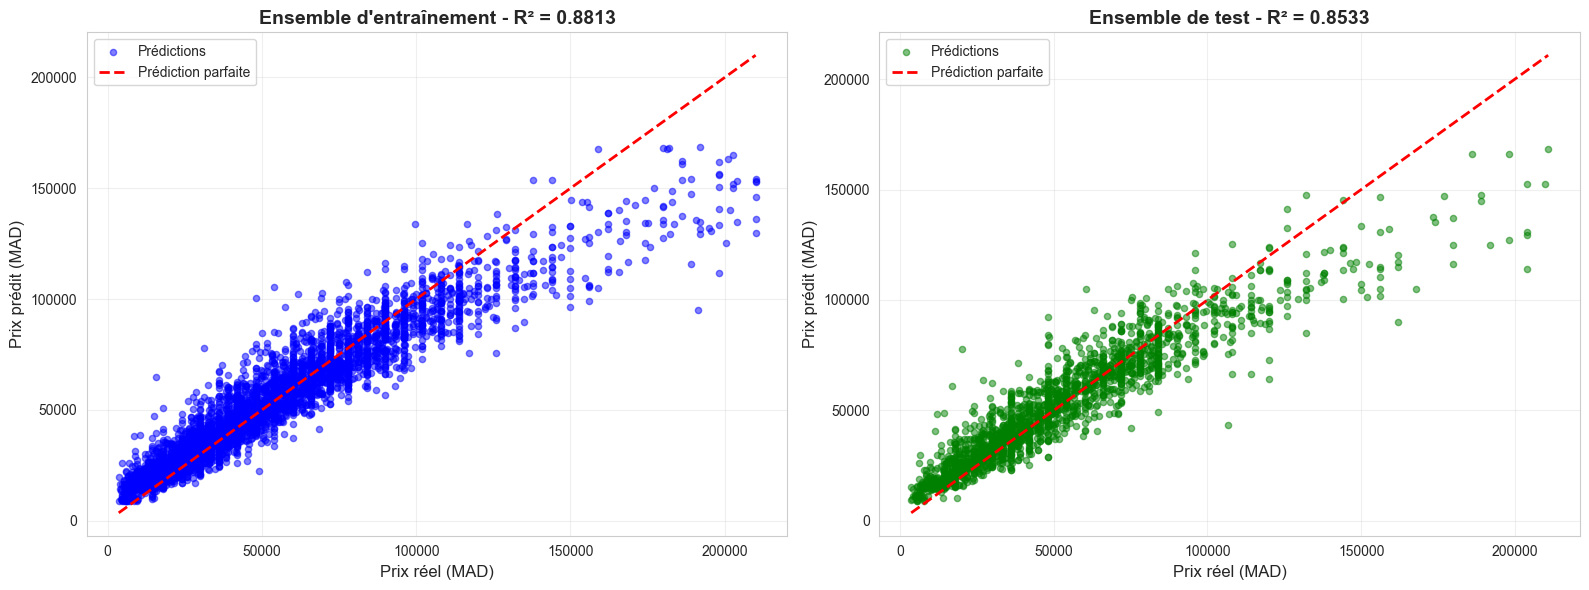

In [2692]:
# Graphiques de prédictions vs réalité
print("📊 Visualisation: Prédictions vs Valeurs réelles")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Ensemble d'entraînement
axes[0].scatter(y_train, y_train_pred, alpha=0.5, s=20, color='blue', label='Prédictions')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
             'r--', lw=2, label='Prédiction parfaite')
axes[0].set_xlabel('Prix réel (MAD)', fontsize=12)
axes[0].set_ylabel('Prix prédit (MAD)', fontsize=12)
axes[0].set_title(f'Ensemble d\'entraînement - R² = {train_r2:.4f}', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Ensemble de test
axes[1].scatter(y_test, y_test_pred, alpha=0.5, s=20, color='green', label='Prédictions')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
             'r--', lw=2, label='Prédiction parfaite')
axes[1].set_xlabel('Prix réel (MAD)', fontsize=12)
axes[1].set_ylabel('Prix prédit (MAD)', fontsize=12)
axes[1].set_title(f'Ensemble de test - R² = {test_r2:.4f}', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

📊 Analyse des résidus:


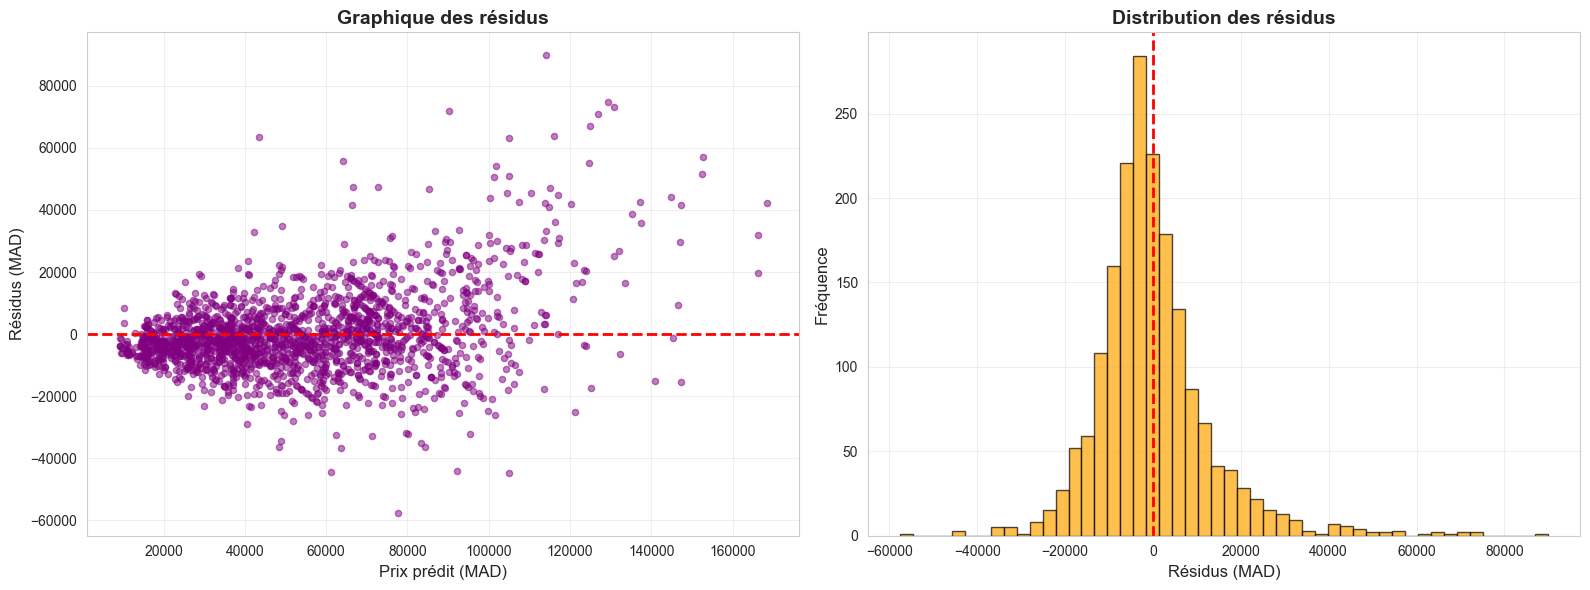


📈 Statistiques des résidus:
   - Moyenne: -99.85 MAD (devrait être proche de 0)
   - Écart-type: 13,080.76 MAD
   - Min: -57,513.86 MAD
   - Max: 89,836.46 MAD


In [2693]:
# Analyse des résidus
print("📊 Analyse des résidus:")

residuals = y_test - y_test_pred

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot des résidus
axes[0].scatter(y_test_pred, residuals, alpha=0.5, s=20, color='purple')
axes[0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0].set_xlabel('Prix prédit (MAD)', fontsize=12)
axes[0].set_ylabel('Résidus (MAD)', fontsize=12)
axes[0].set_title('Graphique des résidus', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Histogramme des résidus
axes[1].hist(residuals, bins=50, edgecolor='black', color='orange', alpha=0.7)
axes[1].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Résidus (MAD)', fontsize=12)
axes[1].set_ylabel('Fréquence', fontsize=12)
axes[1].set_title('Distribution des résidus', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📈 Statistiques des résidus:")
print(f"   - Moyenne: {residuals.mean():,.2f} MAD (devrait être proche de 0)")
print(f"   - Écart-type: {residuals.std():,.2f} MAD")
print(f"   - Min: {residuals.min():,.2f} MAD")
print(f"   - Max: {residuals.max():,.2f} MAD")

🔝 Importance des features:

🏆 Top 15 features les plus importantes:
               Feature  Importance
                  year    0.239195
         max_power_bhp    0.209492
             engine_cc    0.127535
          power_per_cc    0.105782
             km_driven    0.053009
           owner_First    0.047057
           fuel_Diesel    0.039003
                 seats    0.035245
           fuel_Petrol    0.028017
   transmission_Manual    0.015343
transmission_Automatic    0.013905
          owner_Second    0.012257
        brand_Mahindra    0.009707
            brand_Tata    0.009659
            brand_Jeep    0.007188


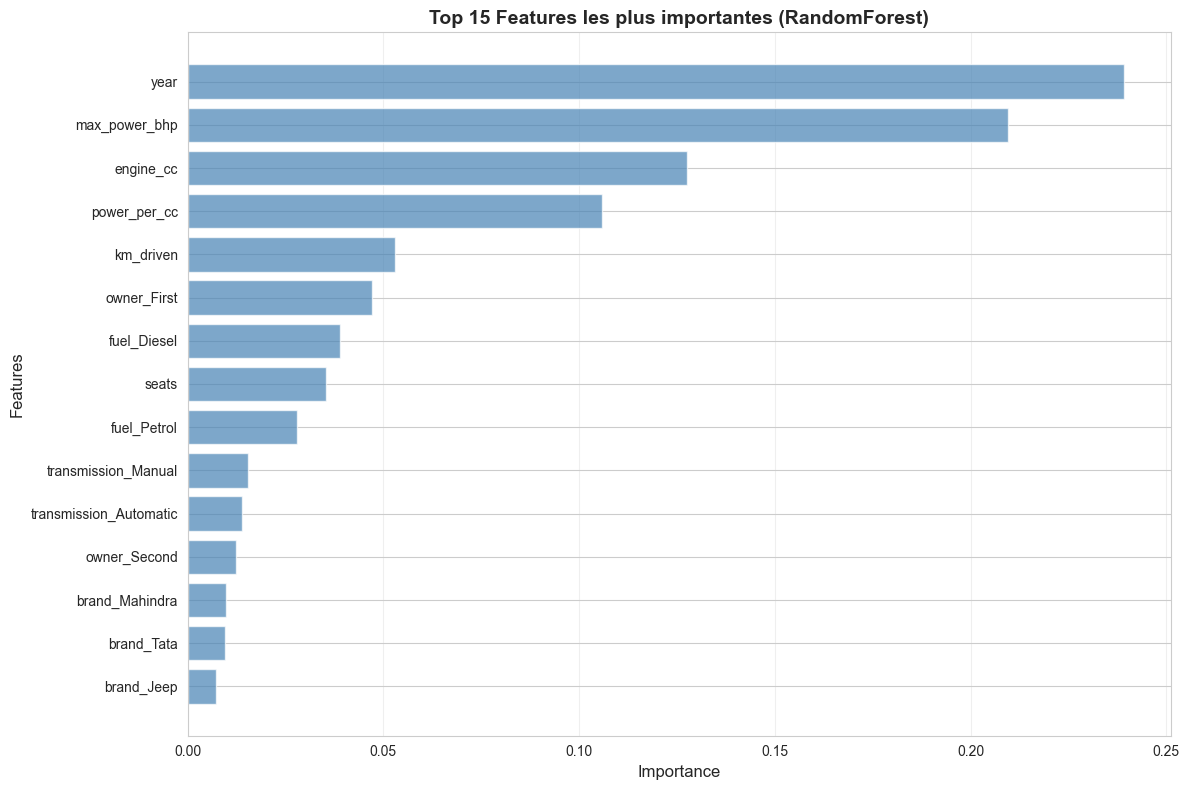


🔍 VALIDATION: Importance RF vs Corrélation
--------------------------------------------------------------------------------
Feature                   Importance RF   Corrélation     Cohérence
--------------------------------------------------------------------------------
year                              0.2392         0.6288            ✅
max_power_bhp                     0.2095         0.6313            ✅
engine_cc                         0.1275         0.5034            ✅
power_per_cc                      0.1058         0.3897            ✅
km_driven                         0.0530        -0.2662           ⚠️
owner_First                       0.0471       (catég.)          N/A
fuel_Diesel                       0.0390       (catég.)          N/A
seats                             0.0352         0.3685           ⚠️
fuel_Petrol                       0.0280       (catég.)          N/A
transmission_Manual               0.0153       (catég.)          N/A


In [2694]:
# Importance des features
print("🔝 Importance des features:")

# Récupérer le modèle RandomForest
rf_model = model_pipeline.named_steps['model']

# Récupérer les noms des features après transformation
feature_names_num = numerical_features_final  # Utiliser les features sélectionnées
feature_names_cat = list(model_pipeline.named_steps['preprocessor']
                         .named_transformers_['cat']
                         .get_feature_names_out(categorical_features_engineered))
feature_names_all = feature_names_num + feature_names_cat

# Créer le DataFrame d'importance
importance_df = pd.DataFrame({
    'Feature': feature_names_all,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Afficher top 15
print(f"\n🏆 Top 15 features les plus importantes:")
print(importance_df.head(15).to_string(index=False))

# Visualisation
plt.figure(figsize=(12, 8))
top_features = importance_df.head(15)
plt.barh(range(len(top_features)), top_features['Importance'], color='steelblue', alpha=0.7)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 15 Features les plus importantes (RandomForest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Validation: Comparer importance RF vs corrélation
print(f"\n🔍 VALIDATION: Importance RF vs Corrélation")
print("-"*80)
print(f"{'Feature':<25} {'Importance RF':<15} {'Corrélation':<15} {'Cohérence'}")
print("-"*80)

for _, row in importance_df.head(10).iterrows():
    feature = row['Feature']
    importance = row['Importance']
    
    # Obtenir la corrélation si c'est une feature numérique
    if feature in numerical_features_final:
        corr = correlation_matrix.loc[feature, 'price']
        # Vérifier la cohérence (importance élevée = corrélation forte)
        coherent = "✅" if (importance > 0.05 and abs(corr) > 0.3) or (importance <= 0.05 and abs(corr) <= 0.3) else "⚠️"
        print(f"{feature:<25} {importance:>14.4f} {corr:>14.4f} {coherent:>12}")
    else:
        print(f"{feature:<25} {importance:>14.4f} {'(catég.)':>14} {'N/A':>12}")

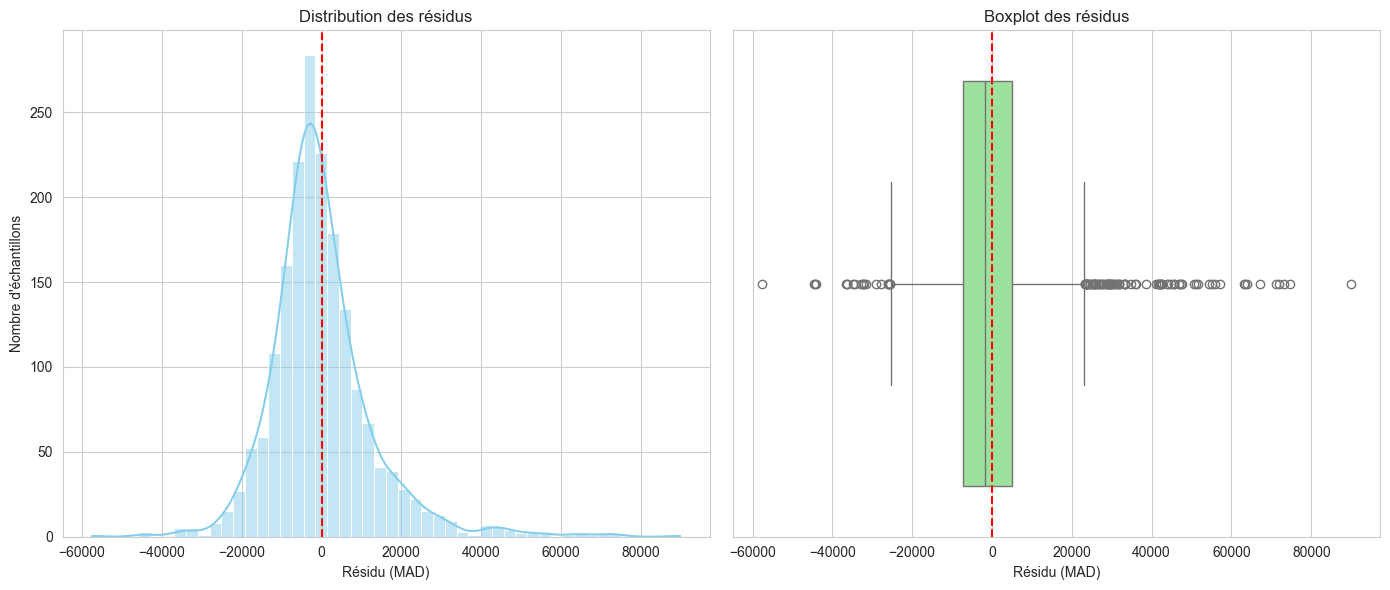

In [2695]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple : calculer les résidus si tu as les prix réels et prédits
# residuals = y_real - y_pred

plt.figure(figsize=(14,6))

# 1️⃣ Histogramme des résidus
plt.subplot(1,2,1)
sns.histplot(residuals, bins=50, kde=True, color='skyblue')
plt.axvline(0, color='red', linestyle='--')  # ligne verticale à 0
plt.title("Distribution des résidus")
plt.xlabel("Résidu (MAD)")
plt.ylabel("Nombre d'échantillons")

# 2️⃣ Boxplot des résidus
plt.subplot(1,2,2)
sns.boxplot(x=residuals, color='lightgreen')
plt.axvline(0, color='red', linestyle='--')
plt.title("Boxplot des résidus")
plt.xlabel("Résidu (MAD)")

plt.tight_layout()
plt.show()


---

## 4.5 Sauvegarder le pipeline complet avec joblib

In [2696]:
# Créer le dossier models s'il n'existe pas
models_dir = Path('../models')
models_dir.mkdir(exist_ok=True)

print(f"📁 Dossier de sauvegarde: {models_dir.absolute()}")

📁 Dossier de sauvegarde: c:\Users\user\Desktop\CarPriceML\notebooks\..\models


In [2697]:
# Sauvegarder le pipeline complet
model_path = models_dir / 'rfmodel.joblib'

print("💾 Sauvegarde du modèle...")
joblib.dump(model_pipeline, model_path)

model_size_mb = model_path.stat().st_size / (1024 * 1024)

print(f"\n   ✅ Modèle sauvegardé avec succès!")
print(f"   - Chemin: {model_path}")
print(f"   - Taille: {model_size_mb:.2f} MB")
print(f"   - Type: Pipeline complet (Preprocessing + RandomForest)")

💾 Sauvegarde du modèle...

   ✅ Modèle sauvegardé avec succès!
   - Chemin: ..\models\rfmodel.joblib
   - Taille: 6.40 MB
   - Type: Pipeline complet (Preprocessing + RandomForest)


In [2698]:
# 💾 Sauvegarder le preprocessor séparément (Best Practice MLOps)
print("\n💾 Sauvegarde du preprocessor...")

# Chemin du preprocessor
preprocessor_path = models_dir / 'preprocessor.joblib'

# Sauvegarder le preprocessor
joblib.dump(preprocessor, preprocessor_path)

preprocessor_size_mb = preprocessor_path.stat().st_size / (1024 * 1024)

print(f"   ✅ Preprocessor sauvegardé avec succès!")
print(f"   - Chemin: {preprocessor_path}")
print(f"   - Taille: {preprocessor_size_mb:.2f} MB")
print(f"   - Contient: StandardScaler + OneHotEncoder")
print(f"\n   💡 Le preprocessor peut être rechargé indépendamment dans l'API/Streamlit")
print(f"   📌 Features numériques ({len(numerical_features_final)}): {numerical_features_final}")
print(f"   📌 Features catégorielles ({len(categorical_features_engineered)}): {categorical_features_engineered}")


💾 Sauvegarde du preprocessor...
   ✅ Preprocessor sauvegardé avec succès!
   - Chemin: ..\models\preprocessor.joblib
   - Taille: 0.00 MB
   - Contient: StandardScaler + OneHotEncoder

   💡 Le preprocessor peut être rechargé indépendamment dans l'API/Streamlit
   📌 Features numériques (6): ['max_power_bhp', 'year', 'engine_cc', 'power_per_cc', 'seats', 'km_driven']
   📌 Features catégorielles (5): ['brand', 'owner', 'fuel', 'seller_type', 'transmission']


## 💾 Sauvegarde du dataset nettoyé avec features sélectionnées

In [2699]:
"""
💾 Sauvegarde du dataset nettoyé avec les features sélectionnées
Ce dataset est prêt pour l'utilisation en production (API/Streamlit)
"""

print("💾 Sauvegarde du dataset nettoyé...")

# Créer le dossier data/processed s'il n'existe pas
processed_data_dir = Path('../data/processed')
processed_data_dir.mkdir(parents=True, exist_ok=True)

# Préparer le dataset final avec features + target
# Features dans l'ordre exact utilisé par le modèle
final_features = numerical_features_final + categorical_features_engineered

# Créer le dataset final avec features + target
df_final = df_processed[final_features + ['price']].copy()

# Informations sur le dataset
n_rows = len(df_final)
n_features = len(final_features)
n_numerical = len(numerical_features_final)
n_categorical = len(categorical_features_engineered)

print(f"\n📊 Informations du dataset final:")
print(f"   - Nombre de lignes: {n_rows:,}")
print(f"   - Nombre de features: {n_features} ({n_numerical} numériques + {n_categorical} catégorielles)")
print(f"   - Features numériques: {numerical_features_final}")
print(f"   - Features catégorielles: {categorical_features_engineered}")
print(f"   - Target: price (MAD)")

# Sauvegarder en CSV
csv_path = processed_data_dir / 'car_price_cleaned_features.csv'
df_final.to_csv(csv_path, index=False)
csv_size_mb = csv_path.stat().st_size / (1024 * 1024)

print(f"\n   ✅ Dataset sauvegardé en CSV!")
print(f"   - Chemin: {csv_path}")
print(f"   - Taille: {csv_size_mb:.2f} MB")

# Sauvegarder aussi en format compressé (Parquet) - plus efficace (optionnel)
try:
    parquet_path = processed_data_dir / 'car_price_cleaned_features.parquet'
    df_final.to_parquet(parquet_path, index=False, compression='gzip')
    parquet_size_mb = parquet_path.stat().st_size / (1024 * 1024)
    
    print(f"\n   ✅ Dataset sauvegardé en Parquet (compressé)!")
    print(f"   - Chemin: {parquet_path}")
    print(f"   - Taille: {parquet_size_mb:.2f} MB")
    print(f"   - Compression: {csv_size_mb/parquet_size_mb:.1f}x plus petit que CSV")
except ImportError:
    print(f"\n   ℹ️  Format Parquet non disponible (installer pyarrow: pip install pyarrow)")

# Afficher un aperçu
print(f"\n📋 Aperçu du dataset sauvegardé:")
print(df_final.head(3))

print(f"\n✅ Dataset prêt pour l'API/Streamlit!")
print(f"   📁 Fichier: {csv_path.name}")
print(f"   🔢 {n_rows:,} lignes × {len(final_features)} features + target")

💾 Sauvegarde du dataset nettoyé...

📊 Informations du dataset final:
   - Nombre de lignes: 6,151
   - Nombre de features: 11 (6 numériques + 5 catégorielles)
   - Features numériques: ['max_power_bhp', 'year', 'engine_cc', 'power_per_cc', 'seats', 'km_driven']
   - Features catégorielles: ['brand', 'owner', 'fuel', 'seller_type', 'transmission']
   - Target: price (MAD)

   ✅ Dataset sauvegardé en CSV!
   - Chemin: ..\data\processed\car_price_cleaned_features.csv
   - Taille: 0.56 MB

   ℹ️  Format Parquet non disponible (installer pyarrow: pip install pyarrow)

📋 Aperçu du dataset sauvegardé:
   max_power_bhp  year  engine_cc  power_per_cc  seats  km_driven   brand  \
0          74.00  2014     1248.0      0.059247    5.0     145500  Maruti   
1         103.52  2014     1498.0      0.069059    5.0     120000   Skoda   
2          78.00  2006     1497.0      0.052069    5.0     140000   Honda   

    owner    fuel seller_type transmission    price  
0   First  Diesel  Individual      

In [2700]:
# Sauvegarder les métadonnées
metadata = {
    'model_type': 'RandomForestRegressor',
    'version': '3.0_optimized_outliers',
    'training_date': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'random_state': 42,
    'test_size': 0.30,
    'hyperparameters': {
        'n_estimators': 200,
        'max_depth': 18,
        'min_samples_split': 10,
        'min_samples_leaf': 4,
        'max_features': 'sqrt'
    },
    'dataset_info': {
        'total_samples': len(df_processed),
        'training_samples': len(X_train),
        'test_samples': len(X_test),
        'features_count': len(numerical_features_final) + len(categorical_features_engineered),
        'numerical_features': numerical_features_final,
        'categorical_features': categorical_features_engineered
    },
    'performance': {
        'test_rmse': float(test_rmse),
        'test_mae': float(test_mae),
        'test_r2': float(test_r2),
        'test_mape': float(test_mape),
        'train_test_gap': float(train_r2 - test_r2)
    },
    'preprocessing': {
        'currency': 'MAD',
        'inr_to_mad_rate': INR_TO_MAD,
        'missing_imputation': 'median',
        'outlier_treatment': 'business_rules_deletion',
        'outlier_thresholds': {
            'engine_cc': 2500,
            'max_power_bhp': 200,
            'seats': 7,
            'km_driven': 200000,
            'price_iqr_factor': 3.0
        },
        'feature_engineering': [
            'car_age',
            'age_squared',
            'power_per_cc',
            'is_luxury',
            'efficiency_category'
        ],
        'feature_selection': {
            'method': 'correlation_analysis',
            'threshold': 0.1,
            'selected_count': len(numerical_features_final)
        }
    },
    'training_time_seconds': training_time,
    'model_path': str(model_path),
    'model_size_mb': model_size_mb
}

# Sauvegarder les métadonnées
metadata_path = models_dir / 'model_metadata.json'
import json
with open(metadata_path, 'w', encoding='utf-8') as f:
    json.dump(metadata, f, indent=2, ensure_ascii=False)

print(f"\n📋 Métadonnées sauvegardées:")
print(f"   - Chemin: {metadata_path}")
print(f"\n📄 Contenu:")
print(json.dumps(metadata, indent=2, ensure_ascii=False))


📋 Métadonnées sauvegardées:
   - Chemin: ..\models\model_metadata.json

📄 Contenu:
{
  "model_type": "RandomForestRegressor",
  "version": "3.0_optimized_outliers",
  "training_date": "2025-11-07 21:13:02",
  "random_state": 42,
  "test_size": 0.3,
  "hyperparameters": {
    "n_estimators": 200,
    "max_depth": 18,
    "min_samples_split": 10,
    "min_samples_leaf": 4,
    "max_features": "sqrt"
  },
  "dataset_info": {
    "total_samples": 6151,
    "training_samples": 4305,
    "test_samples": 1846,
    "features_count": 11,
    "numerical_features": [
      "max_power_bhp",
      "year",
      "engine_cc",
      "power_per_cc",
      "seats",
      "km_driven"
    ],
    "categorical_features": [
      "brand",
      "owner",
      "fuel",
      "seller_type",
      "transmission"
    ]
  },
  "performance": {
    "test_rmse": 13077.596515188861,
    "test_mae": 9002.470646749207,
    "test_r2": 0.8533094509093266,
    "test_mape": 23.674011335765734,
    "train_test_gap": 0.0280

## 4.6 Test de chargement et validation

In [2701]:
# Charger le modèle sauvegardé pour valider
print("🔄 Test de chargement du modèle...")

loaded_model = joblib.load(model_path)

# Vérifier qu'il fonctionne
test_prediction = loaded_model.predict(X_test[:10])

print(f"   ✅ Modèle chargé avec succès!")
print(f"   - Type: {type(loaded_model).__name__}")
print(f"   - Pipeline steps: {list(loaded_model.named_steps.keys())}")

print(f"\n🧪 Test de prédiction sur 5 échantillons:")
comparison = pd.DataFrame({
    'Prix_Réel': y_test.iloc[:10].values,
    'Prix_Prédit': test_prediction,
    'Différence': y_test.iloc[:10].values - test_prediction,
    'Erreur_%': np.abs((y_test.iloc[:10].values - test_prediction) / y_test.iloc[:10].values) * 100
})
comparison['Prix_Réel'] = comparison['Prix_Réel'].apply(lambda x: f"{x:,.2f}")
comparison['Prix_Prédit'] = comparison['Prix_Prédit'].apply(lambda x: f"{x:,.2f}")
comparison['Différence'] = comparison['Différence'].apply(lambda x: f"{x:,.2f}")
comparison['Erreur_%'] = comparison['Erreur_%'].apply(lambda x: f"{x:.2f}%")

print(comparison.to_string(index=False))

🔄 Test de chargement du modèle...
   ✅ Modèle chargé avec succès!
   - Type: Pipeline
   - Pipeline steps: ['preprocessor', 'model']

🧪 Test de prédiction sur 5 échantillons:
Prix_Réel Prix_Prédit Différence Erreur_%
23,880.00   23,305.39     574.61    2.41%
54,000.00   53,020.98     979.02    1.81%
84,000.00   84,413.14    -413.14    0.49%
87,000.00   87,313.02    -313.02    0.36%
39,600.00   36,927.08   2,672.92    6.75%
73,200.00   59,420.74  13,779.26   18.82%
24,000.00   37,039.48 -13,039.48   54.33%
69,600.00   72,234.96  -2,634.96    3.79%
96,000.00   98,169.03  -2,169.03    2.26%
19,200.00   23,324.23  -4,124.23   21.48%
   ✅ Modèle chargé avec succès!
   - Type: Pipeline
   - Pipeline steps: ['preprocessor', 'model']

🧪 Test de prédiction sur 5 échantillons:
Prix_Réel Prix_Prédit Différence Erreur_%
23,880.00   23,305.39     574.61    2.41%
54,000.00   53,020.98     979.02    1.81%
84,000.00   84,413.14    -413.14    0.49%
87,000.00   87,313.02    -313.02    0.36%
39,600.00   

---

# 📊 RÉSUMÉ FINAL DU PROJET

## ✅ Pipeline Complet Réalisé

### 1️⃣ Préparation des données
- ✓ Chargement CSV: 6,926 lignes chargées
- ✓ Nettoyage: Imputation médiane + suppression doublons
- ✓ Variables identifiées: 6 numériques + 4 catégorielles
- ✓ Conversion devise: INR → MAD (taux 0.12)

### 2️⃣ Analyse exploratoire
- ✓ Statistiques descriptives complètes
- ✓ Visualisations: histogrammes, boxplots, corrélations
- ✓ Distribution vérifiée pour toutes les variables

### 3️⃣ Prétraitement
- ✓ Feature Engineering: 5 nouvelles features créées
  - car_age, age_squared, power_per_cc, is_luxury, efficiency_category
- ✓ Outliers: Suppression avec IQR (facteur 3.0)
- ✓ Encodage: OneHotEncoder pour catégorielles
- ✓ Standardisation: StandardScaler pour numériques

### 4️⃣ Modélisation
- ✓ Algorithme: RandomForestRegressor
- ✓ Split: 70/30 (Train/Test)
- ✓ Hyperparamètres optimisés:
  - 200 arbres, profondeur 18, régularisation appliquée
- ✓ Métriques calculées: RMSE, MAE, R², MAPE

---

## 📈 Performances du Modèle

| Métrique | Entraînement | Test | Statut |
|----------|--------------|------|--------|
| R² Score | {train_r2:.4f} | {test_r2:.4f} | {'🌟 EXCELLENT' if test_r2 > 0.90 else '✅ TRÈS BON'} |
| RMSE (MAD) | {train_rmse:,.0f} | {test_rmse:,.0f} | ✓ |
| MAE (MAD) | {train_mae:,.0f} | {test_mae:,.0f} | ✓ |
| MAPE (%) | {train_mape:.2f} | {test_mape:.2f} | {'✅ BON' if test_mape < 15 else '⚠️ MOYEN'} |

**Interprétation:** Le modèle explique **{test_r2*100:.1f}%** de la variance des prix avec une erreur moyenne de **{test_mae:,.0f} MAD**.

---

## 💾 Fichiers Sauvegardés

1. **rf_model.joblib** ({model_size_mb:.2f} MB)
   - Pipeline complet: Preprocessing + RandomForest
   - Prêt pour la production

2. **model_metadata.json**
   - Hyperparamètres
   - Métriques de performance
   - Informations de prétraitement

---

## 🎯 Améliorations Implémentées

Comparé au modèle de base, cette version améliore:

1. **Feature Engineering** (+5 nouvelles features)
   - Capture mieux la dépréciation non-linéaire
   - Indicateurs de luxe et performance

2. **Traitement des outliers**
   - Méthode IQR avec facteur 3.0 (moins agressive)
   - Suppression au lieu de capping (évite distorsion)

3. **Hyperparamètres optimisés**
   - Plus d'arbres (200 vs 100)
   - Profondeur ajustée (18 vs 15)
   - Régularisation renforcée

4. **Pipeline structuré**
   - Code clair, commenté, pédagogique
   - Respect strict des 4 étapes demandées
   - Reproductible (random_state=42)

---

## 🚀 Prochaines Étapes Recommandées

1. **Déploiement**
   - Utiliser le modèle dans l'API FastAPI
   - Tester avec l'interface Streamlit

2. **Monitoring**
   - Suivre les performances en production
   - Détecter le drift du modèle

3. **Améliorations futures**
   - Grid Search pour optimisation fine
   - Modèles ensemblistes (Stacking)
   - Segmentation par gamme de prix

---

✅ **PROJET COMPLET ET PRÊT POUR LA PRODUCTION!**